## Project :- Credit card data Analysis

In [6]:
# Importated Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [7]:
df = pd.read_csv("/Credit_card.csv")

In [8]:
df1=pd.read_csv("/Credit_card_label.csv")

In [9]:
df.head()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2


In [10]:
df.shape

(1548, 18)

In [11]:
#checking for null values
df.isnull().sum()

Ind_ID               0
GENDER               7
Car_Owner            0
Propert_Owner        0
CHILDREN             0
Annual_income       23
Type_Income          0
EDUCATION            0
Marital_status       0
Housing_type         0
Birthday_count      22
Employed_days        0
Mobile_phone         0
Work_Phone           0
Phone                0
EMAIL_ID             0
Type_Occupation    488
Family_Members       0
dtype: int64

In [12]:
#checking whether an observation has more than 1 null value and if, dropping all such observations
x = df[df.isnull().sum(axis=1)>1].index

In [13]:
df.drop(x,inplace = True)

In [14]:
df.shape

(1531, 18)

In [15]:
df.isnull().sum()

Ind_ID               0
GENDER               5
Car_Owner            0
Propert_Owner        0
CHILDREN             0
Annual_income       15
Type_Income          0
EDUCATION            0
Marital_status       0
Housing_type         0
Birthday_count      15
Employed_days        0
Mobile_phone         0
Work_Phone           0
Phone                0
EMAIL_ID             0
Type_Occupation    471
Family_Members       0
dtype: int64

In [16]:
#checking for duplicate rows
df.duplicated().sum()

0

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1531 entries, 0 to 1547
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Ind_ID           1531 non-null   int64  
 1   GENDER           1526 non-null   object 
 2   Car_Owner        1531 non-null   object 
 3   Propert_Owner    1531 non-null   object 
 4   CHILDREN         1531 non-null   int64  
 5   Annual_income    1516 non-null   float64
 6   Type_Income      1531 non-null   object 
 7   EDUCATION        1531 non-null   object 
 8   Marital_status   1531 non-null   object 
 9   Housing_type     1531 non-null   object 
 10  Birthday_count   1516 non-null   float64
 11  Employed_days    1531 non-null   int64  
 12  Mobile_phone     1531 non-null   int64  
 13  Work_Phone       1531 non-null   int64  
 14  Phone            1531 non-null   int64  
 15  EMAIL_ID         1531 non-null   int64  
 16  Type_Occupation  1060 non-null   object 
 17  Family_Members

In [18]:
df.columns

Index(['Ind_ID', 'GENDER', 'Car_Owner', 'Propert_Owner', 'CHILDREN',
       'Annual_income', 'Type_Income', 'EDUCATION', 'Marital_status',
       'Housing_type', 'Birthday_count', 'Employed_days', 'Mobile_phone',
       'Work_Phone', 'Phone', 'EMAIL_ID', 'Type_Occupation', 'Family_Members'],
      dtype='object')

In [19]:
##renaming columns for convinience
df = df.rename(columns = {"GENDER":"gender","Car_Owner":"car_owner","Propert_Owner":"property_owner","CHILDREN":"children","Annual_income":"income",
                    "Type_Income":"income_type","EDUCATION":"edu","Marital_status":"marital_status","Housing_type":"housing_type",
                    "Birthday_count":"bday_count","Employed_days":"employed_days","Mobile_phone":"m_phone","Work_Phone":"work_phone",
                    "Phone":"phone","EMAIL_ID":"email","Type_Occupation":"occu_type","Family_Members":"fam_mem"})

In [20]:
df.head()

,Ind_ID,gender,car_owner,property_owner,children,income,income_type,edu,marital_status,housing_type,bday_count,employed_days,m_phone,work_phone,phone,email,occu_type,fam_mem
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2
6,5009754,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2
7,5009894,F,N,N,0,180000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-22134.0,365243,1,0,0,0,NaN,2


## Univariate Analysis

### Gender

In [21]:
df["gender"].isnull().sum()

5

In [22]:
df["gender"].value_counts("normalize")*100

F    62.975098
M    37.024902
Name: gender, dtype: float64

<Axes: ylabel='gender'>

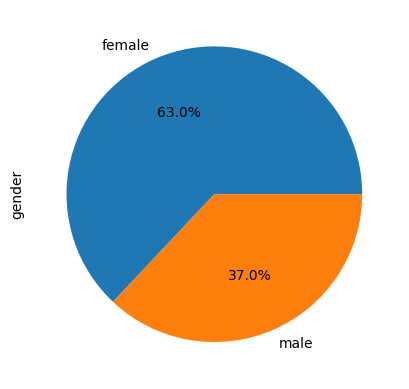

In [23]:
df["gender"].value_counts("normalize").plot(kind = "pie", autopct = "%1.1f%%",labels =["female","male"] )

### insights
        -Female percentage is much higher in data as to male
        -There are few missing values

### car owner

In [24]:
df["car_owner"].isnull().sum()

0

In [25]:
df["car_owner"].value_counts("normalize")*100

N    59.568909
Y    40.431091
Name: car_owner, dtype: float64

<Axes: ylabel='car_owner'>

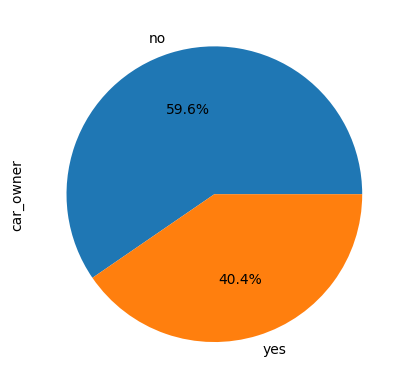

In [26]:
df["car_owner"].value_counts("normalize").plot(kind = "pie", autopct = "%1.1f%%",labels =["no","yes"] )

### insights
            -majority of people dont own a car
            -there are no missing values

## property owner

In [27]:
df["property_owner"].isnull().sum()

0

<Axes: >

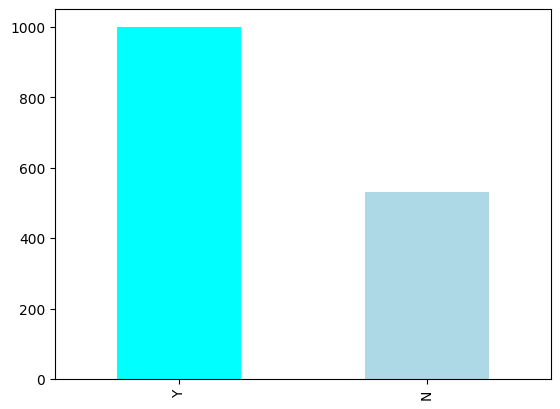

In [28]:
df["property_owner"].value_counts().plot(kind = "bar",color = ["cyan","lightblue"])

In [29]:
df["property_owner"].value_counts("normalize")*100

Y    65.316786
N    34.683214
Name: property_owner, dtype: float64

### insights
        -most people dont own any property
        -there are  no missing values

### children

In [30]:
df["children"].isnull().sum()

0

<Axes: >

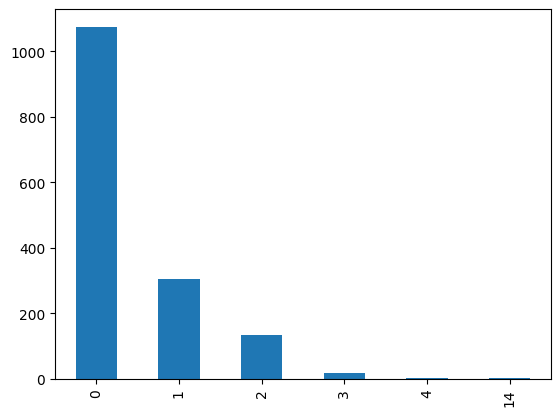

In [31]:
##outlier
df["children"].value_counts().plot(kind = "bar")

In [32]:
df["children"].value_counts("normalize")*100

0     70.215545
1     19.921620
2      8.687133
3      1.045069
4      0.065317
14     0.065317
Name: children, dtype: float64

### insights :
            -most people have no children(around 70%)
            -only a few more than 2 children
            -there are a outlier where one has 14 children
            -there are no missing values in our data

## income

In [33]:
df["income"].isnull().sum()

15

In [34]:
df["income"].describe()

count    1.516000e+03
mean     1.914848e+05
std      1.134096e+05
min      3.375000e+04
25%      1.215000e+05
50%      1.665000e+05
75%      2.250000e+05
max      1.575000e+06
Name: income, dtype: float64

<Axes: xlabel='income', ylabel='Count'>

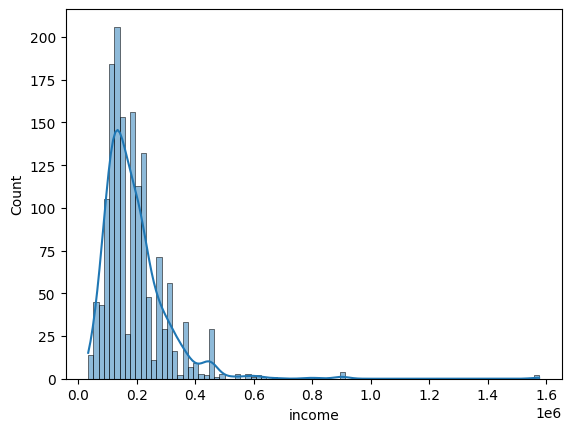

In [35]:
sns.histplot(df["income"],kde = True)

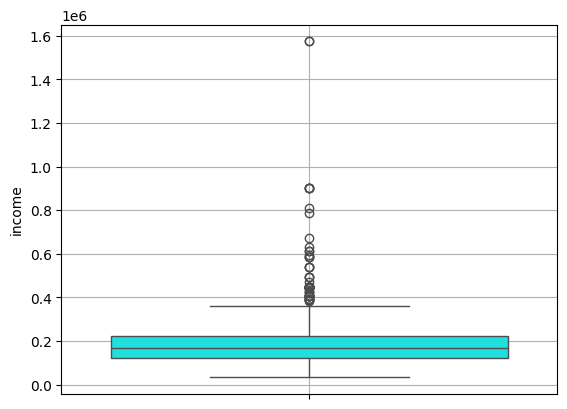

In [36]:
sns.boxplot(df["income"],color = "cyan")
plt.grid()

In [37]:
px.box(df, y="income", title="Income Boxplot")

In [38]:
df["income"].skew()

3.928891138530272

<Axes: ylabel='Density'>

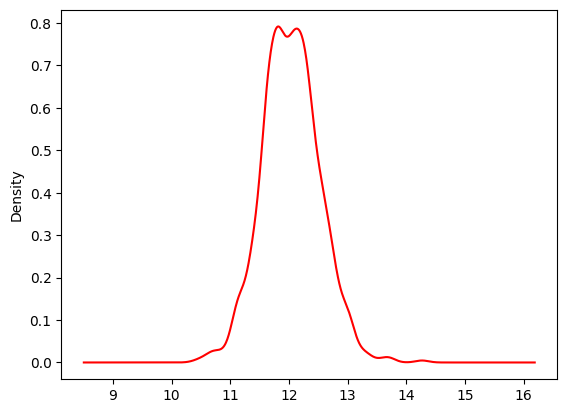

In [39]:
np.log(df["income"]).plot(kind = "kde",color = "red")

## insights
            -most people have income on lower side and that do isnt uniformly distributed
            -there a more than few outliers
            -income columns has a skewness of over 3(right skewed)

### income type

In [40]:
df["income_type"].isnull().sum()

0

In [41]:
df["income_type"].value_counts("normalize")*100

Working                 51.796212
Commercial associate    23.709993
Pensioner               16.917048
State servant            7.576747
Name: income_type, dtype: float64

In [42]:
px.bar(df["income_type"].value_counts(),text = "value",color = df["income_type"].value_counts())

### insights-
            -around half of people are working professionals
            -there are no missing values

## education

In [43]:
df["edu"].isnull().sum()

0

In [44]:
df["edu"].value_counts("normalize")*100

Secondary / secondary special    66.492489
Higher education                 27.563684
Incomplete higher                 4.441541
Lower secondary                   1.371653
Academic degree                   0.130634
Name: edu, dtype: float64

In [45]:
px.bar(df["edu"].value_counts(),text = "value",color = df["edu"].value_counts())

### insights -
            -most people have secondry education level
            -only a quarter of people have completed higher edication
            -there are no missing values

### marital status

In [46]:
df["marital_status"].isnull().sum()

0

In [47]:
df["marital_status"].value_counts("normalize")*100

Married                 67.602874
Single / not married    14.696277
Civil marriage           6.596995
Separated                6.205095
Widow                    4.898759
Name: marital_status, dtype: float64

In [48]:
px.bar(df["marital_status"].value_counts(),text = "value",color = df["marital_status"].value_counts())

In [49]:
#mix civil marriage and married
df["marital_status"]=df["marital_status"].replace("Single / not married","not married")

### insights -
            -about quater of people are married(married + civil marriage)
            -there are no missing values in data

### housing type

In [50]:
df["housing_type"].isnull().sum()

0

In [51]:
df["housing_type"].value_counts("normalize")*100

House / apartment      89.026780
With parents            5.225343
Municipal apartment     3.461790
Rented apartment        1.371653
Office apartment        0.587851
Co-op apartment         0.326584
Name: housing_type, dtype: float64

In [52]:
px.bar(df["housing_type"].value_counts(),text = "value",color = df["housing_type"].value_counts())

In [53]:
df["housing_type"]=df["housing_type"].replace("House / apartment","House")

### insights-
            -around 90% of people live house or apartments
            -few people live under other type of settings
            -there are no  missing values

### mobile phone

In [54]:
df["m_phone"].isnull().sum()

0

In [55]:
df["m_phone"].value_counts()

1    1531
Name: m_phone, dtype: int64

### work phone

In [56]:
df["work_phone"].isnull().sum()

0

In [57]:
df["work_phone"].value_counts("normalize")*100

0    79.229262
1    20.770738
Name: work_phone, dtype: float64

## any_phone

In [58]:
df["phone"].isnull().sum()

0

In [59]:
df["phone"].value_counts("normalize")*100

0    69.170477
1    30.829523
Name: phone, dtype: float64

### insights-
            -all people have mobile phones
            -around 80 percent of people have work phone
            -around 70 percent of people have provided their phone number
            -there are no missing values in all three columns

### email

In [60]:
df["email"].isnull().sum()

0

In [61]:
df["email"].value_counts("normalize")*100

0    90.6597
1     9.3403
Name: email, dtype: float64

<Axes: ylabel='email'>

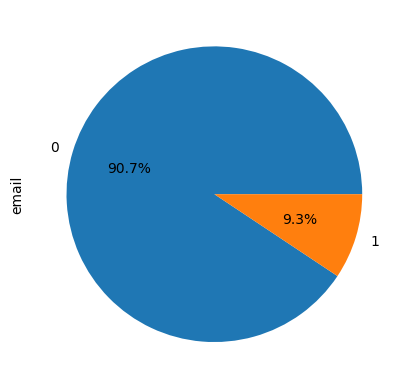

In [62]:
df["email"].value_counts().plot(kind = "pie",autopct = "%1.1f%%")

### insights-
            -only 10% poeple haven't provided email details
            -there are no missing values

### occupation type

In [63]:
df["occu_type"].isnull().sum()

471

In [64]:
df["occu_type"].value_counts().shape

(18,)

In [65]:
df["occu_type"].value_counts("normalize").cumsum().head(8)

Laborers                 0.252830
Core staff               0.416981
Managers                 0.545283
Sales staff              0.660377
Drivers                  0.741509
High skill tech staff    0.802830
Medicine staff           0.850000
Accountants              0.891509
Name: occu_type, dtype: float64

### insights-
            -there are aroung 18 types of occupation
            -around 90 percent of people come from 8 top occupation type
            -there are no missing values

### family member

In [66]:
df["fam_mem"].isnull().sum()

0

In [67]:
df["fam_mem"].value_counts("normalize")*100

2     51.469628
1     21.685173
3     17.439582
4      8.295232
5      0.979752
6      0.065317
15     0.065317
Name: fam_mem, dtype: float64

<Axes: ylabel='fam_mem'>

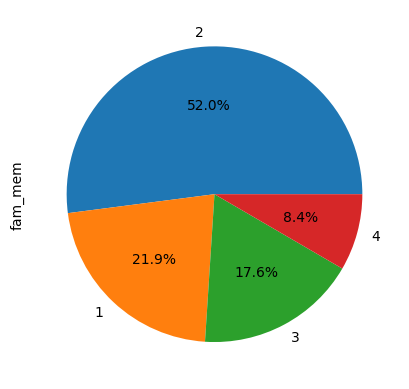

In [68]:
##outlier
df["fam_mem"].value_counts().head(4).plot(kind = "pie",autopct = "%1.1f%%")

### insights -
            -family sizes are generally less than three
            -there are no missing values
            -outlier where family size is 15(clearlu evident)/or may be data error

## bday_count

In [69]:
df["bday_count"].isnull().sum()

15

In [70]:
df["bday_count"].describe()

count     1516.000000
mean    -16023.662929
std       4220.765191
min     -24946.000000
25%     -19499.000000
50%     -15649.500000
75%     -12401.250000
max      -7705.000000
Name: bday_count, dtype: float64

<Axes: xlabel='bday_count', ylabel='Count'>

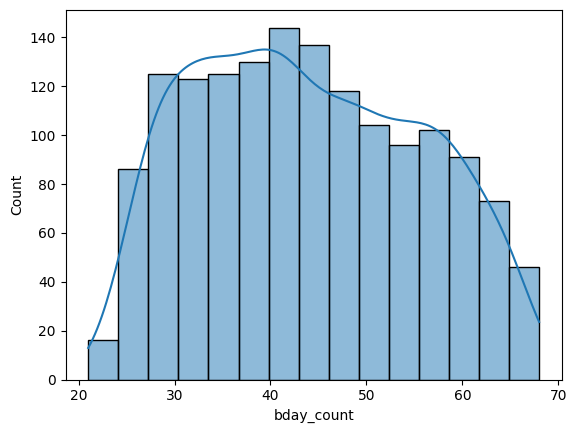

In [71]:
sns.histplot((-df["bday_count"]/365).round(),kde = True)

<Axes: >

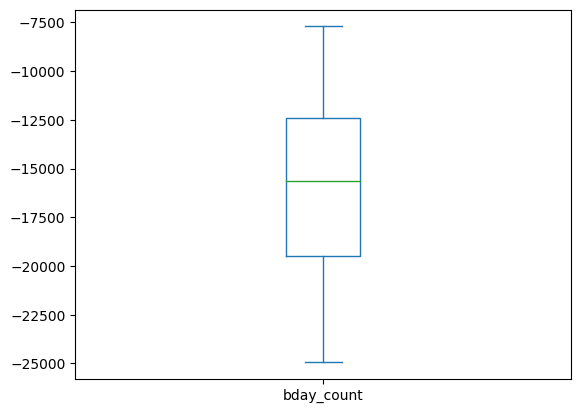

In [72]:
df["bday_count"].plot(kind = "box")

## insights-
                   1-most poeple lie in 30 to 50 age range
                   2-there are few missing values
                   3-there are no outliers

## employed_days

In [73]:
df[abs(df["employed_days"])>(-df["bday_count"])].shape[0]

252

In [74]:
df[abs(df["employed_days"])>(-df["bday_count"])]["employed_days"].describe()

count       252.0
mean     365243.0
std           0.0
min      365243.0
25%      365243.0
50%      365243.0
75%      365243.0
max      365243.0
Name: employed_days, dtype: float64

In [75]:
df[~(abs(df["employed_days"])>(-df["bday_count"]))]["employed_days"].describe()

count     1279.000000
mean     -2677.308835
std       2400.716399
min     -14887.000000
25%      -3524.000000
50%      -1966.000000
75%       -959.000000
max        -73.000000
Name: employed_days, dtype: float64

## insights-
             -in employed days columns 252 rows have their value as 365243 which is impossible suggests some error in data
             -there are few missing values in bday count column
             -most poeple are in 30 to 60 range (although there is no such clear disinction)

## BI/Multi-Variate Analysis

### gender-income

In [76]:
#gender wise mean income
px.bar(df.groupby("gender").mean()["income"].round(0),text = "value",color = df["gender"].value_counts())

<ipython-input-76-06bde7d6a795>:2: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



### insights-
            1-men generally have higher average than women

### gender - car owner

In [77]:
df.groupby("gender")["car_owner"].value_counts()

gender  car_owner
F       N            707
        Y            254
M       Y            361
        N            204
Name: car_owner, dtype: int64

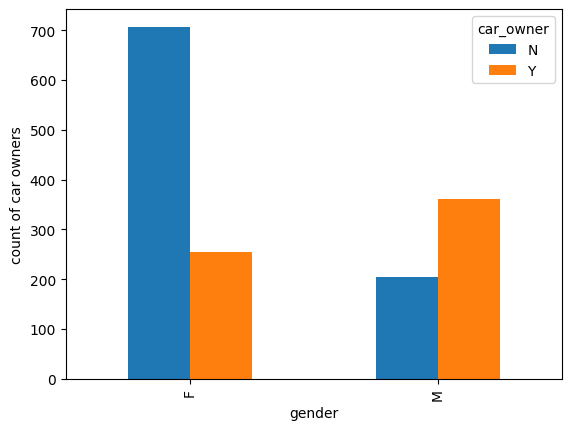

In [78]:
#gener wise owuner of car
df.groupby("gender")["car_owner"].value_counts().unstack().plot(kind = "bar")
plt.ylabel("count of car owners")
plt.show()

In [79]:
df.head(2)

,Ind_ID,gender,car_owner,property_owner,children,income,income_type,edu,marital_status,housing_type,bday_count,employed_days,m_phone,work_phone,phone,email,occu_type,fam_mem
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House,-18772.0,365243,1,0,0,0,NaN,2
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House,-13557.0,-586,1,1,1,0,NaN,2


### car_owner-income

In [80]:
#car_owner vs mean income
px.bar(df.groupby("car_owner").mean()["income"].round(0),text = "value")

<ipython-input-80-0073b6d95588>:2: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



## insights-
                1-poeple owning car have higher average income(that too by a large differnece)

In [81]:
df["edu"] = df["edu"].replace("Secondary / secondary special","secondary")

## EDU-INcome

<ipython-input-82-c38e93e62493>:2: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



<Axes: xlabel='edu'>

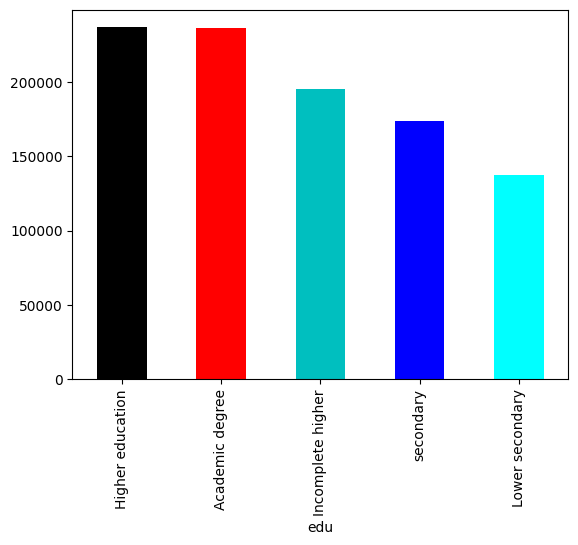

In [82]:
##education level and mean income
df.groupby("edu").mean()["income"].round(0).sort_values(ascending = False).plot(kind = "bar",color = ["black","red","c","b","cyan"])

<ipython-input-83-b3a89bb86ccf>:2: FutureWarning:

Dropping invalid columns in DataFrameGroupBy.max is deprecated. In a future version, a TypeError will be raised. Before calling .max, select only columns which should be valid for the function.



<Axes: xlabel='edu'>

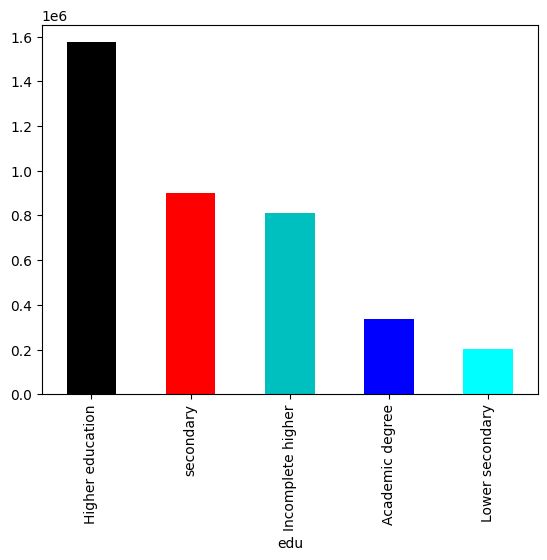

In [83]:
#education level wise max income
df.groupby("edu").max()["income"].round(0).sort_values(ascending = False).plot(kind = "bar",color = ["black","red","c","b","cyan"] )

## insights -
                1-poeple completing higher education have higher income
                2-apart from higher education there is no direct relation between incoem and level of education

## Gender-Education

In [84]:
##gender wise education level
df.groupby("gender")["edu"].value_counts().unstack()

edu,Academic degree,Higher education,Incomplete higher,Lower secondary,secondary
gender,,,,,
F,2.0,247.0,46.0,14.0,652.0
M,NaN,171.0,22.0,7.0,365.0


<Axes: xlabel='edu'>

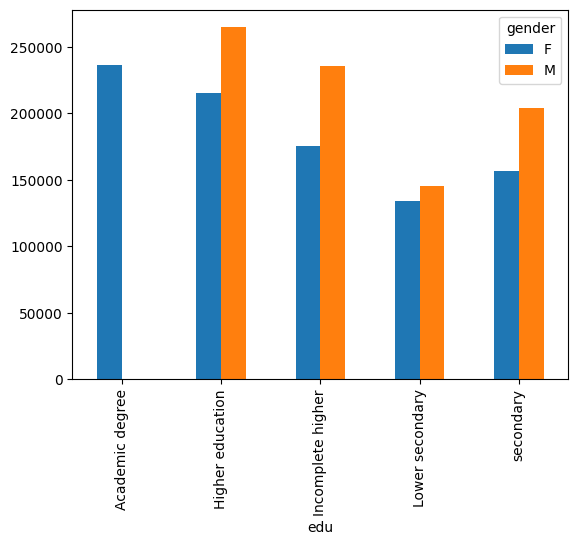

In [85]:
pd.pivot_table(data = df,index = "edu",columns = "gender",values = "income",aggfunc='mean').round(0).plot(kind = "bar")

## Gender - Marital_status

In [86]:

df.groupby("gender")["marital_status"].value_counts().unstack()

marital_status,Civil marriage,Married,Separated,Widow,not married
gender,,,,,
F,62,615,70,73,141
M,39,417,24,2,83


In [87]:
df.groupby("edu")["marital_status"].value_counts().unstack()

marital_status,Civil marriage,Married,Separated,Widow,not married
edu,,,,,
Academic degree,1.0,NaN,NaN,NaN,1.0
Higher education,18.0,306.0,33.0,6.0,59.0
Incomplete higher,10.0,39.0,5.0,3.0,11.0
Lower secondary,2.0,14.0,NaN,2.0,3.0
secondary,70.0,676.0,57.0,64.0,151.0


## housing_type-Income

<ipython-input-88-ae3d80992b9d>:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



<Axes: xlabel='housing_type'>

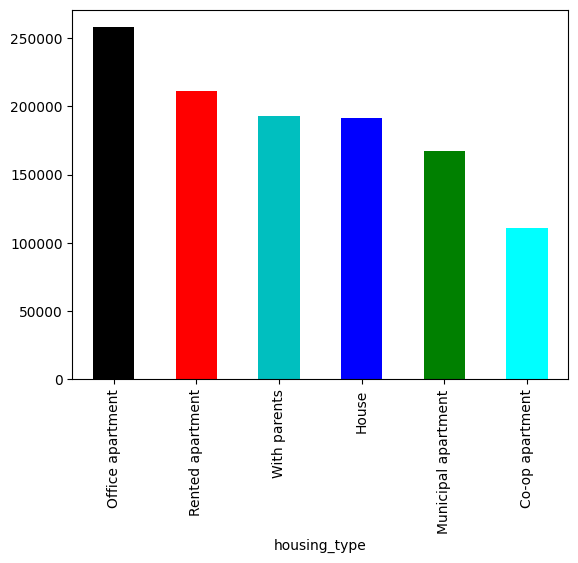

In [88]:
df.groupby("housing_type").mean()["income"].round(0).sort_values(ascending = False).plot(kind = "bar",color = ["black","red","c","b","green","cyan"])

## children-income

In [89]:
df[df["children"]==14]

,Ind_ID,gender,car_owner,property_owner,children,income,income_type,edu,marital_status,housing_type,bday_count,employed_days,m_phone,work_phone,phone,email,occu_type,fam_mem
565,5061207,M,Y,Y,14,225000.0,Working,secondary,Separated,House,-17754.0,-1689,1,0,0,0,Drivers,15


In [90]:
##dropping outlier

df.drop(565,inplace = True)

In [91]:
df[df["children"]==14]

,Ind_ID,gender,car_owner,property_owner,children,income,income_type,edu,marital_status,housing_type,bday_count,employed_days,m_phone,work_phone,phone,email,occu_type,fam_mem


<ipython-input-92-d4e9f44ed645>:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



<Axes: xlabel='children'>

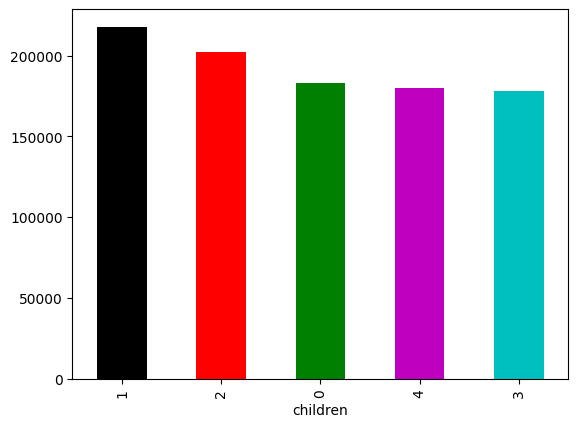

In [92]:
df.groupby("children").mean()["income"].round(0).sort_values(ascending = False).plot(kind = "bar",color = ["black","red","g","m","c"])

## insights-
                1-poeple having less children genrally have high income

In [93]:
df.groupby("children")["housing_type"].value_counts()

children  housing_type       
0         House                  952
          With parents            53
          Municipal apartment     45
          Rented apartment        14
          Office apartment         6
          Co-op apartment          5
1         House                  274
          With parents            17
          Rented apartment         7
          Municipal apartment      5
          Office apartment         2
2         House                  120
          With parents            10
          Municipal apartment      2
          Office apartment         1
3         House                   15
          Municipal apartment      1
4         House                    1
Name: housing_type, dtype: int64

## property_owner-Gender

In [94]:
df.groupby("gender")["property_owner"].value_counts("normalize").unstack()

property_owner,N,Y
gender,,
F,0.331946,0.668054
M,0.372340,0.627660


<Axes: xlabel='gender'>

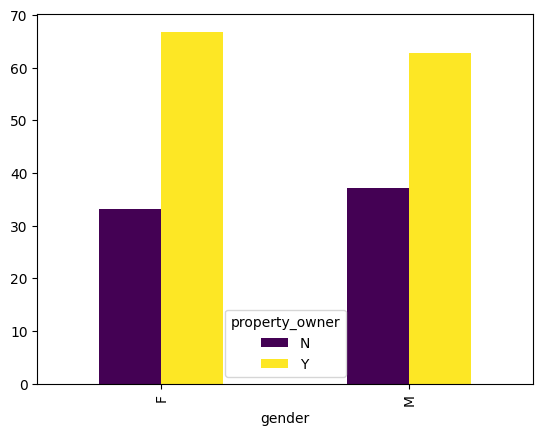

In [95]:
(df.groupby("gender")["property_owner"].value_counts("normalize").unstack()*100).plot(kind = "bar",cmap = "viridis")

## insights-
                1-females are more likely to own property than men

In [96]:
df.head(2)

,Ind_ID,gender,car_owner,property_owner,children,income,income_type,edu,marital_status,housing_type,bday_count,employed_days,m_phone,work_phone,phone,email,occu_type,fam_mem
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House,-18772.0,365243,1,0,0,0,NaN,2
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House,-13557.0,-586,1,1,1,0,NaN,2


## employed column

In [97]:
def employed(val):
    if val>=0:
        return 0
    else:
        return 1

In [98]:
employed=df["employed_days"].apply(employed)

In [99]:
df.insert(12,"employed",employed)

In [100]:
df.head()

,Ind_ID,gender,car_owner,property_owner,children,income,income_type,edu,marital_status,housing_type,bday_count,employed_days,employed,m_phone,work_phone,phone,email,occu_type,fam_mem
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House,-18772.0,365243,0,1,0,0,0,NaN,2
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House,-13557.0,-586,1,1,1,1,0,NaN,2
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House,-13557.0,-586,1,1,1,1,0,NaN,2
6,5009754,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House,-13557.0,-586,1,1,1,1,0,NaN,2
7,5009894,F,N,N,0,180000.0,Pensioner,secondary,Married,House,-22134.0,365243,0,1,0,0,0,NaN,2


In [101]:
df["employed"].value_counts()*100/len(df)

1    83.529412
0    16.470588
Name: employed, dtype: float64

<ipython-input-102-1ab7e09aefe8>:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



<Axes: xlabel='employed'>

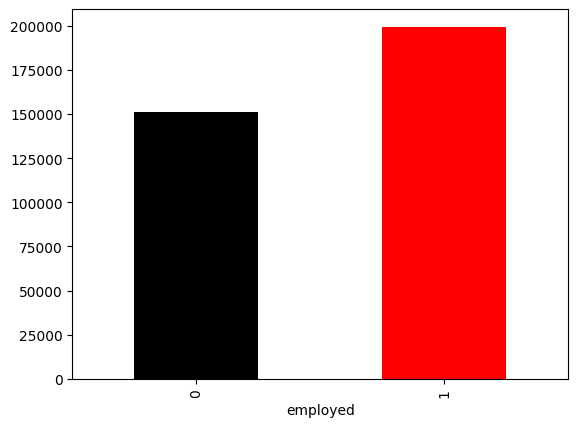

In [102]:
df.groupby("employed").mean()["income"].plot(kind = "bar",color = ["black","red"])

In [103]:
df.groupby("employed")["edu"].value_counts().unstack()

edu,Academic degree,Higher education,Incomplete higher,Lower secondary,secondary
employed,,,,,
0,NaN,42.0,3.0,7.0,200.0
1,2.0,380.0,65.0,14.0,817.0


In [104]:
df.groupby("employed")["property_owner"].value_counts()

employed  property_owner
0         Y                 192
          N                  60
1         Y                 807
          N                 471
Name: property_owner, dtype: int64

In [105]:
#unemployed people who dont own any property dont own car too
df.groupby("employed")["car_owner"].value_counts()

employed  car_owner
0         N            190
          Y             62
1         N            722
          Y            556
Name: car_owner, dtype: int64

In [106]:
df.head()

,Ind_ID,gender,car_owner,property_owner,children,income,income_type,edu,marital_status,housing_type,bday_count,employed_days,employed,m_phone,work_phone,phone,email,occu_type,fam_mem
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House,-18772.0,365243,0,1,0,0,0,NaN,2
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House,-13557.0,-586,1,1,1,1,0,NaN,2
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House,-13557.0,-586,1,1,1,1,0,NaN,2
6,5009754,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House,-13557.0,-586,1,1,1,1,0,NaN,2
7,5009894,F,N,N,0,180000.0,Pensioner,secondary,Married,House,-22134.0,365243,0,1,0,0,0,NaN,2


In [107]:
df1.head()

,Ind_ID,label
0,5008827,1
1,5009744,1
2,5009746,1
3,5009749,1
4,5009752,1


# MERGE

In [108]:
pd.set_option("display.max_column",None)

In [109]:
df = df.merge(df1,on = "Ind_ID")

In [110]:
df.head()

,Ind_ID,gender,car_owner,property_owner,children,income,income_type,edu,marital_status,housing_type,bday_count,employed_days,employed,m_phone,work_phone,phone,email,occu_type,fam_mem,label
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House,-18772.0,365243,0,1,0,0,0,NaN,2,1
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House,-13557.0,-586,1,1,1,1,0,NaN,2,1
2,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House,-13557.0,-586,1,1,1,1,0,NaN,2,1
3,5009754,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House,-13557.0,-586,1,1,1,1,0,NaN,2,1
4,5009894,F,N,N,0,180000.0,Pensioner,secondary,Married,House,-22134.0,365243,0,1,0,0,0,NaN,2,1


In [111]:
df["bday_count"]=df["bday_count"].apply(lambda x:(-x)/365).round(0)

In [112]:
df["bday_count"]

0       51.0
1       37.0
2       37.0
3       37.0
4       61.0
        ... 
1525    33.0
1526    28.0
1527    36.0
1528    42.0
1529    45.0
Name: bday_count, Length: 1530, dtype: float64

<Axes: ylabel='Density'>

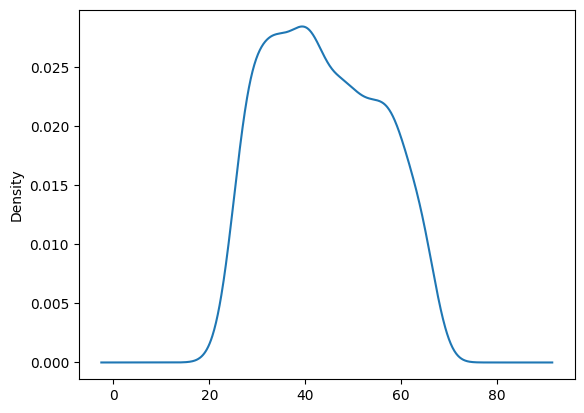

In [113]:
df["bday_count"].plot(kind="kde")

In [114]:
df.head()

,Ind_ID,gender,car_owner,property_owner,children,income,income_type,edu,marital_status,housing_type,bday_count,employed_days,employed,m_phone,work_phone,phone,email,occu_type,fam_mem,label
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House,51.0,365243,0,1,0,0,0,NaN,2,1
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House,37.0,-586,1,1,1,1,0,NaN,2,1
2,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House,37.0,-586,1,1,1,1,0,NaN,2,1
3,5009754,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House,37.0,-586,1,1,1,1,0,NaN,2,1
4,5009894,F,N,N,0,180000.0,Pensioner,secondary,Married,House,61.0,365243,0,1,0,0,0,NaN,2,1


In [115]:
px.histogram(df,x = "bday_count",y="income")

In [116]:
df.groupby("gender").mean()["bday_count"].round(0)

<ipython-input-116-b28a1fa53770>:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



gender
F    46.0
M    41.0
Name: bday_count, dtype: float64

In [117]:
df.groupby("property_owner").mean()["bday_count"].round(0)

<ipython-input-117-b70b43b18205>:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



property_owner
N    42.0
Y    45.0
Name: bday_count, dtype: float64

In [118]:
df.groupby("car_owner").mean()["bday_count"].round(0)

<ipython-input-118-e95e1a46e402>:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



car_owner
N    45.0
Y    42.0
Name: bday_count, dtype: float64

In [119]:
df.groupby("marital_status").mean()["bday_count"].reset_index().round(0)

<ipython-input-119-e1209788d619>:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



,marital_status,bday_count
0,Civil marriage,41.0
1,Married,44.0
2,Separated,47.0
3,Widow,56.0
4,not married,41.0


In [120]:
df["bday_count"].isnull().sum()

15

# label -Target column

In [121]:
df["label"].value_counts()

0    1362
1     168
Name: label, dtype: int64

In [122]:
df["label"].isnull().sum()

0

###  label vs gender

In [123]:
df.groupby("gender")["label"].value_counts("normalize").unstack()*100

label,0,1
gender,,
F,90.634755,9.365245
M,86.702128,13.297872


<Axes: xlabel='label', ylabel='gender'>

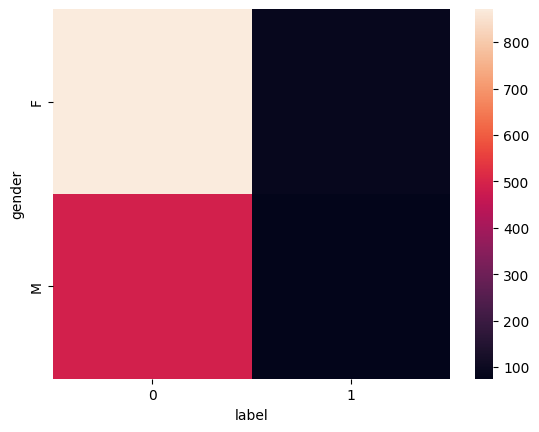

In [124]:
sns.heatmap(pd.crosstab(df["gender"],df["label"]))

## findings-
                -men are more likely to have their application approved (but the difference isn't that big)
                

## label vs income

In [125]:
px.bar(df.groupby("label").mean()["income"].round(0),text = "value",color = df["label"].value_counts())

<ipython-input-125-b9fc2e2f95b0>:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



## findings -
                -poeple have good credit have better average income

## label vs family mem

In [126]:
fam = df[df["fam_mem"]<=2]

In [127]:
fam.shape

(1120, 20)

In [128]:
px.bar(fam["label"].value_counts(),text = "value")

## label-education

In [129]:
df.groupby("edu")["label"].value_counts("normalize").unstack()*100

label,0,1
edu,,
Academic degree,100.000000,NaN
Higher education,87.914692,12.085308
Incomplete higher,92.647059,7.352941
Lower secondary,71.428571,28.571429
secondary,89.577188,10.422812


<Axes: xlabel='edu'>

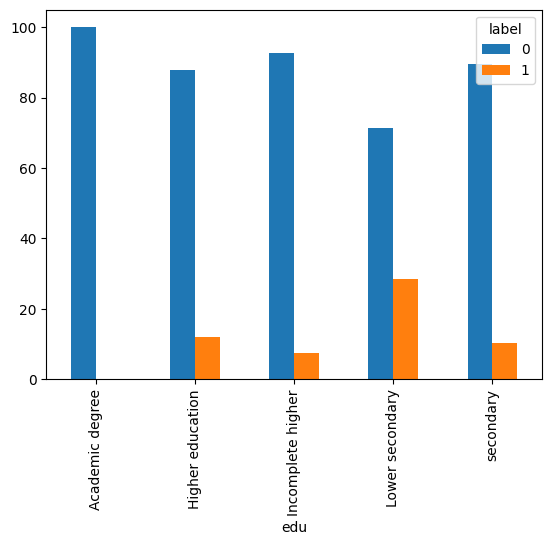

In [130]:
(df.groupby("edu")["label"].value_counts("normalize").unstack()*100).plot(kind = "bar")

## finidngs-
                -there is no such direct relation between level of education and credit
                

## label - EDU - Income

In [131]:
pd.pivot_table(df,index = "label",columns = "edu",values = "income",margins = True).round(0)

edu,Academic degree,Higher education,Incomplete higher,Lower secondary,secondary,All
label,,,,,,
0,236250.0,235046.0,198000.0,142800.0,172596.0,190536.0
1,NaN,249750.0,158400.0,124650.0,181484.0,199098.0
All,236250.0,236773.0,195045.0,137614.0,173513.0,191463.0


In [132]:
fig = px.bar(pd.pivot_table(df,index = "label",columns = "edu",values = "income",aggfunc = "median",margins = True).round(0),facet_col =  "edu")
fig.update_layout(

    width=1200,
    height=600,
    font=dict(size=12)
)

## label-employed

In [133]:
(df.groupby("label")["employed"].value_counts("normalize").unstack()*100)

employed,0,1
label,,
0,16.226138,83.773862
1,18.452381,81.547619


In [134]:
(df.groupby("employed")["label"].value_counts("normalize").unstack()*100)

label,0,1
employed,,
0,87.698413,12.301587
1,89.280125,10.719875


<Axes: xlabel='employed'>

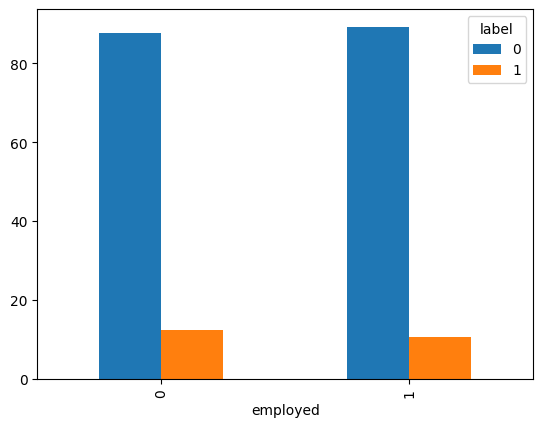

In [135]:
(df.groupby("employed")["label"].value_counts("normalize").unstack()*100).plot(kind = "bar")

In [136]:
df.groupby("employed")["property_owner"].value_counts("normalize").unstack()

property_owner,N,Y
employed,,
0,0.238095,0.761905
1,0.368545,0.631455


## findings-
                -there is no such direct relation of being employed and having a good credit
                -people who are out of employment are having slightly good percentage of goog credit(although data is is highly biased)

## label - property_owner

In [137]:
df.groupby("property_owner")["label"].value_counts("nromalize").unstack()*100

label,0,1
property_owner,,
N,88.512241,11.487759
Y,89.289289,10.710711


<Axes: xlabel='property_owner'>

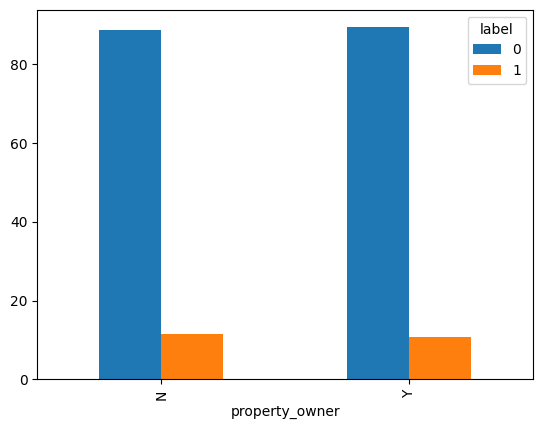

In [138]:
(df.groupby("property_owner")["label"].value_counts("nromalize").unstack()*100).plot(kind = "bar")

## label - car - property owner

<Axes: xlabel='property_owner,car_owner'>

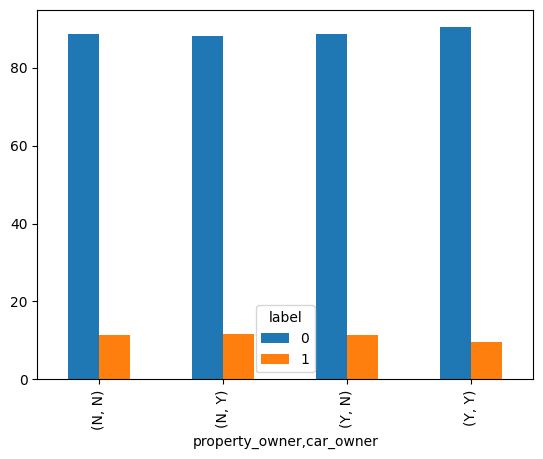

In [139]:
(df.groupby(["property_owner","car_owner"])["label"].value_counts("normalize").unstack()*100).plot(kind="bar")

In [140]:
df.head(2)

,Ind_ID,gender,car_owner,property_owner,children,income,income_type,edu,marital_status,housing_type,bday_count,employed_days,employed,m_phone,work_phone,phone,email,occu_type,fam_mem,label
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House,51.0,365243,0,1,0,0,0,NaN,2,1
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House,37.0,-586,1,1,1,1,0,NaN,2,1


## label-income_type

In [141]:
df.groupby("label")["income_type"].value_counts("normalize").unstack()*100

income_type,Commercial associate,Pensioner,State servant,Working
label,,,,
0,23.127753,16.299559,8.076358,52.496329
1,28.571429,22.023810,3.571429,45.833333


In [142]:
df.groupby("income_type")["label"].value_counts("normalize").unstack()*100

label,0,1
income_type,,
Commercial associate,86.776860,13.223140
Pensioner,85.714286,14.285714
State servant,94.827586,5.172414
Working,90.277778,9.722222


## insights-
                1-pensioners are most likely to get their application approved followed by commercial_associates
            

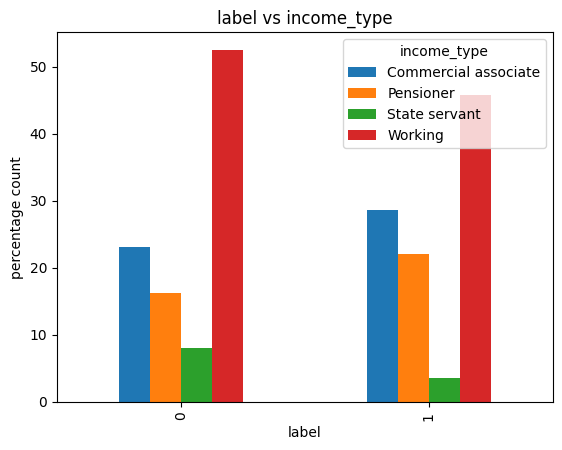

In [143]:
(df.groupby("label")["income_type"].value_counts("normalize").unstack()*100).plot(kind = "bar")
plt.ylabel("percentage count")
plt.title("label vs income_type")
plt.show()

In [144]:
pd.pivot_table(df,index = "label",columns="income_type",values = "income",aggfunc = "median").round(0)

income_type,Commercial associate,Pensioner,State servant,Working
label,,,,
0,202500.0,135000.0,180000.0,157500.0
1,180000.0,112500.0,135000.0,180000.0


<Axes: xlabel='label'>

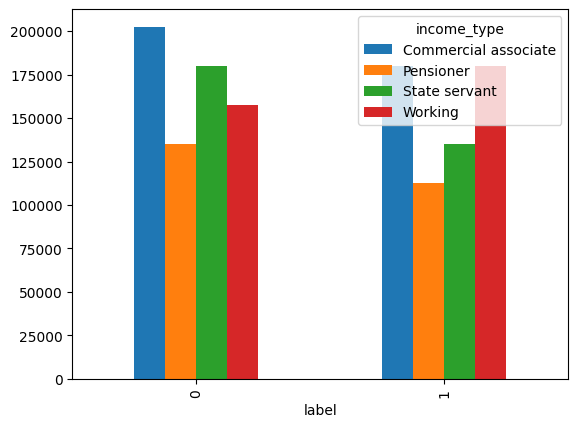

In [145]:
pd.pivot_table(df,index = "label",columns="income_type",values = "income",aggfunc = "median").round(0).plot(kind = "bar")

## label-bday_count

In [146]:
df.groupby("label").mean()["bday_count"]

<ipython-input-146-e7ed2a4ee4ba>:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



label
0    43.752967
1    45.125749
Name: bday_count, dtype: float64

<ipython-input-147-cfddc19baae2>:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



<Axes: xlabel='label'>

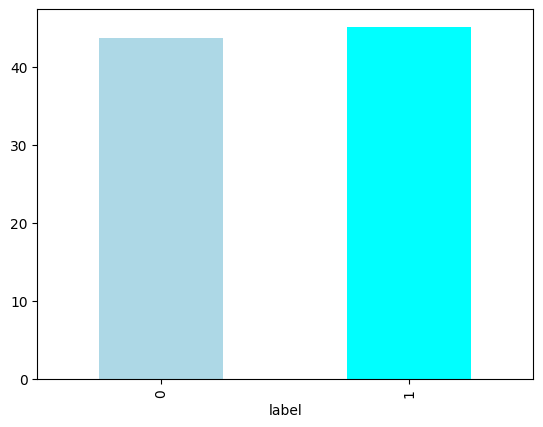

In [147]:
df.groupby("label").mean()["bday_count"].plot(kind = "bar",color = ["lightblue","cyan"])

In [148]:
df[df["label"]==1]["income"].max()

675000.0

In [149]:
df[df["label"]==1]["income"].min()

65250.0

## Feature engineering + analysis

## Employed_Days

In [150]:
pd.set_option("display.max_rows",None)

In [151]:
##converting emp_days column to non negative

df["employed_days"]=abs(df["employed_days"])

In [152]:
df[["employed_days","income","employed"]]

,employed_days,income,employed
0,365243,180000.0,0
1,586,315000.0,1
2,586,315000.0,1
3,586,315000.0,1
4,365243,180000.0,0
5,678,450000.0,1
6,678,450000.0,1
7,678,450000.0,1
8,1002,90000.0,1
9,1002,NaN,1


In [153]:
t_df = df[df["employed_days"]==365243]

In [154]:
df.loc[t_df.index,"employed_days"]=0

In [155]:
df[["employed_days","income","employed","label"]]

,employed_days,income,employed,label
0,0,180000.0,0,1
1,586,315000.0,1,1
2,586,315000.0,1,1
3,586,315000.0,1,1
4,0,180000.0,0,1
5,678,450000.0,1,1
6,678,450000.0,1,1
7,678,450000.0,1,1
8,1002,90000.0,1,1
9,1002,NaN,1,1


In [156]:
df.groupby("label").mean()["employed_days"]

<ipython-input-156-16418396f30b>:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



label
0    2313.234214
1    1618.833333
Name: employed_days, dtype: float64

<ipython-input-157-9b5b58d0ff4b>:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



<Axes: xlabel='label'>

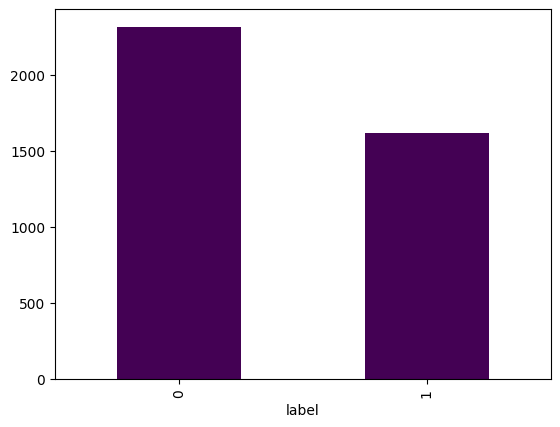

In [157]:
df.groupby("label").mean()["employed_days"].plot(kind = "bar",cmap = "viridis")

## employed_days

In [158]:
df["employed_days"].isnull().sum()

0

In [159]:
df["employed_days"].describe().round()

count     1530.0
mean      2237.0
std       2409.0
min          0.0
25%        453.0
50%       1582.0
75%       3230.0
max      14887.0
Name: employed_days, dtype: float64

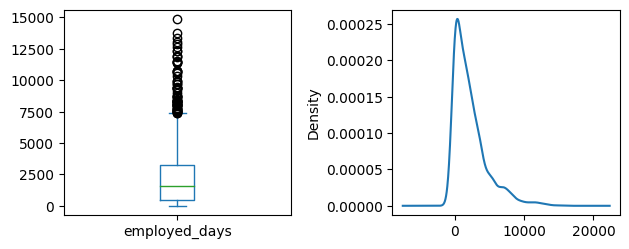

In [160]:
plt.subplot(221)
df["employed_days"].plot(kind = "box")
plt.subplot(222)
df["employed_days"].plot(kind = "kde")
plt.tight_layout()

## insights-
               -there are many outlier in this column
               -values are set to 0 where one is not currently empployed
               -there are no missing values

## bday_count

In [161]:
df["bday_count"].isnull().sum()

15

<Axes: >

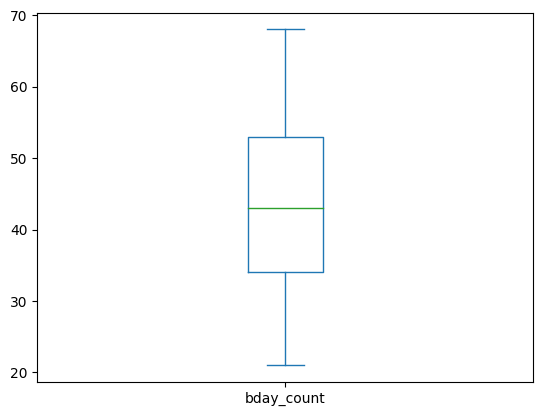

In [162]:
df["bday_count"].plot(kind = "box")

In [163]:
df["bday_count"].describe()

count    1515.000000
mean       43.904290
std        11.581916
min        21.000000
25%        34.000000
50%        43.000000
75%        53.000000
max        68.000000
Name: bday_count, dtype: float64

## insights-
               -average age is around 43
               -most of are in 20-60 age group
               -there are no outliers in this column
               -there are few missing values

In [164]:
#df.to_csv("final_df.csv")

In [165]:
df.head()

,Ind_ID,gender,car_owner,property_owner,children,income,income_type,edu,marital_status,housing_type,bday_count,employed_days,employed,m_phone,work_phone,phone,email,occu_type,fam_mem,label
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House,51.0,0,0,1,0,0,0,NaN,2,1
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House,37.0,586,1,1,1,1,0,NaN,2,1
2,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House,37.0,586,1,1,1,1,0,NaN,2,1
3,5009754,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House,37.0,586,1,1,1,1,0,NaN,2,1
4,5009894,F,N,N,0,180000.0,Pensioner,secondary,Married,House,61.0,0,0,1,0,0,0,NaN,2,1


## dividing dataframe in x and y (target variable)

In [166]:
x = df.drop(columns = ["Ind_ID","label"])
y = df["label"]

## Train-Test split

In [167]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state=3)

In [168]:
x_train.head()

,gender,car_owner,property_owner,children,income,income_type,edu,marital_status,housing_type,bday_count,employed_days,employed,m_phone,work_phone,phone,email,occu_type,fam_mem
783,F,Y,Y,0,112500.0,Working,secondary,Married,House,47.0,1787,1,1,0,0,0,Sales staff,2
927,M,Y,Y,0,292500.0,Working,Higher education,Married,House,28.0,2231,1,1,0,0,0,Managers,2
670,M,N,Y,1,135000.0,Working,secondary,Civil marriage,House,36.0,2728,1,1,0,0,0,NaN,3
823,F,N,Y,2,103500.0,Working,secondary,Married,House,NaN,6621,1,1,1,1,0,Medicine staff,4
778,M,Y,N,2,135000.0,Working,secondary,Married,With parents,46.0,561,1,1,0,0,0,NaN,4


## Missing value Imputation

In [169]:
x_train.isnull().sum()

gender              4
car_owner           0
property_owner      0
children            0
income             14
income_type         0
edu                 0
marital_status      0
housing_type        0
bday_count         10
employed_days       0
employed            0
m_phone             0
work_phone          0
phone               0
email               0
occu_type         382
fam_mem             0
dtype: int64

<Axes: ylabel='Density'>

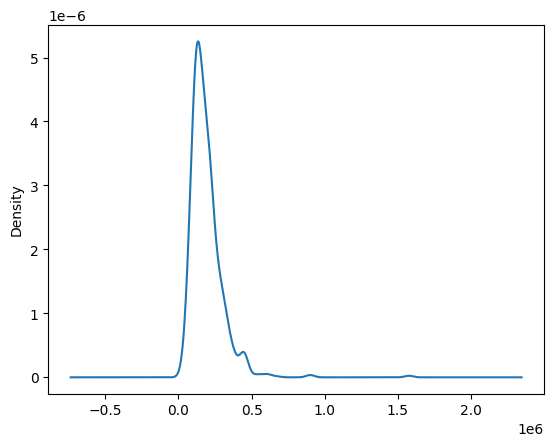

In [170]:
##for mean imputatin checking before and after imputation distribution of income feature
x_train["income"].plot(kind = "kde")

<Axes: ylabel='Density'>

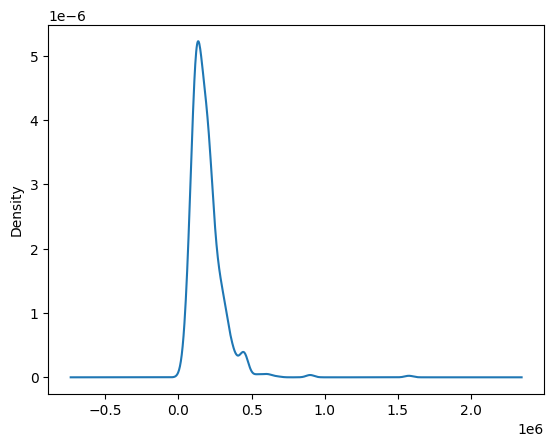

In [171]:
x_train["income"].fillna(x_train["income"].mean()).plot(kind = "kde")

## knn imputer - income and bday_count column

In [172]:
from sklearn.impute import KNNImputer
kn = KNNImputer(n_neighbors=4)
x_train[["income","bday_count"]]=kn.fit_transform(x_train[["income","bday_count"]])

In [173]:
x_test[["income","bday_count"]]=kn.transform(x_test[["income","bday_count"]])

In [174]:
print(x_train.isnull().sum())

gender              4
car_owner           0
property_owner      0
children            0
income              0
income_type         0
edu                 0
marital_status      0
housing_type        0
bday_count          0
employed_days       0
employed            0
m_phone             0
work_phone          0
phone               0
email               0
occu_type         382
fam_mem             0
dtype: int64


In [175]:
print(x_test.isnull().sum())

gender             1
car_owner          0
property_owner     0
children           0
income             0
income_type        0
edu                0
marital_status     0
housing_type       0
bday_count         0
employed_days      0
employed           0
m_phone            0
work_phone         0
phone              0
email              0
occu_type         89
fam_mem            0
dtype: int64


### Gender - Random imputation

In [176]:
x_train["gender_imp"] = x_train["gender"]

In [177]:
x_train["gender_imp"][x_train["gender_imp"].isnull()]= x_train["gender"].dropna().sample(4).values

<ipython-input-177-37db588e7581>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [178]:
x_train.gender_imp.isnull().sum()

0

In [179]:
x_test["gender_imp"] = x_test["gender"]

In [180]:
x_test["gender_imp"][x_test["gender_imp"].isnull()]= x_test["gender"].dropna().sample(x_test["gender_imp"].isnull().sum()).values

<ipython-input-180-3997633c94b8>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [181]:
x_test.gender_imp.isnull().sum()

0

### occupation - Random Imputation

In [182]:
x_train.occu_type.isnull().sum()

382

In [183]:
x_train["occu_imp"] = x_train["occu_type"]

In [184]:
#fix a random state
x_train["occu_imp"][x_train["occu_imp"].isnull()]= x_train["occu_type"].dropna().sample(x_train["occu_imp"].isnull().sum()).values

<ipython-input-184-670ae1eaf3ba>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [185]:
x_train["occu_imp"].isnull().sum()

0

In [186]:
x_test["occu_imp"] = x_test["occu_type"]
x_test["occu_imp"][x_test["occu_imp"].isnull()]= x_test["occu_type"].dropna().sample(x_test["occu_imp"].isnull().sum()).values

<ipython-input-186-db8f9056c85d>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [187]:
from sklearn.preprocessing import OneHotEncoder,LabelEncoder

In [188]:
x_train.head(2)

,gender,car_owner,property_owner,children,income,income_type,edu,marital_status,housing_type,bday_count,employed_days,employed,m_phone,work_phone,phone,email,occu_type,fam_mem,gender_imp,occu_imp
783,F,Y,Y,0,112500.0,Working,secondary,Married,House,47.0,1787,1,1,0,0,0,Sales staff,2,F,Sales staff
927,M,Y,Y,0,292500.0,Working,Higher education,Married,House,28.0,2231,1,1,0,0,0,Managers,2,M,Managers


In [189]:
x_train = x_train.drop(columns = ["gender","occu_type"])
x_test = x_test.drop(columns = ["gender","occu_type"])


# Outlier treatment

### employed_days

<Axes: >

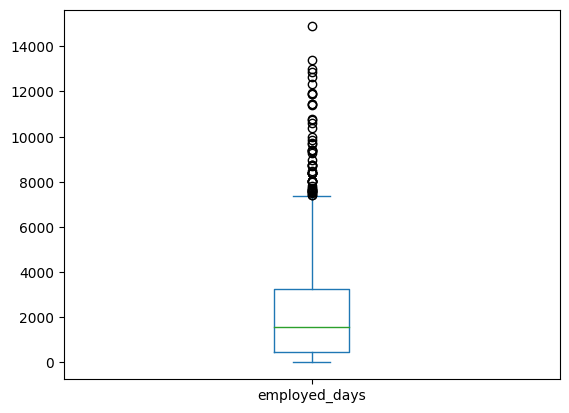

In [190]:
x_train["employed_days"].plot(kind = "box")

In [191]:
q1 = x_train["employed_days"].quantile(.25)
q3 = x_train["employed_days"].quantile(.75)
iqr = q3-q1

In [192]:
x_train[(x_train["employed_days"]<q1 - 1.5*(iqr)) | (x_train["employed_days"]>q3 + 1.5*(iqr))].shape[0]

55

In [193]:
outlier = x_train[(x_train["employed_days"]<q1 - 1.5*(iqr)) | (x_train["employed_days"]>q3 + 1.5*(iqr))]

In [194]:
x_train["employed_days"].describe()

count     1224.000000
mean      2221.332516
std       2371.434265
min          0.000000
25%        456.750000
50%       1584.000000
75%       3233.750000
max      14887.000000
Name: employed_days, dtype: float64

In [195]:
min = q1 - 1.5 * iqr
max = q3 + 1.5 * iqr

In [196]:
outlier["employed_days"].describe()

count       55.000000
mean      9445.563636
std       1865.454197
min       7400.000000
25%       8033.000000
50%       8737.000000
75%      10679.000000
max      14887.000000
Name: employed_days, dtype: float64

In [197]:
outlier["employed_days"]=np.where(outlier["employed_days"]>max,max,outlier["employed_days"])


<ipython-input-197-75129bd9dcd0>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [198]:
outlier["employed_days"].describe()

count      55.00
mean     7399.25
std         0.00
min      7399.25
25%      7399.25
50%      7399.25
75%      7399.25
max      7399.25
Name: employed_days, dtype: float64

In [199]:
outlier["employed_days"]=np.where(outlier["employed_days"]<min,min,outlier["employed_days"])

<ipython-input-199-378b0620ab77>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [200]:
x_train.loc[outlier.index,"employed_days"]=outlier["employed_days"]

In [201]:
x_train["employed_days"].describe()

count    1224.000000
mean     2129.382149
std      2078.526577
min         0.000000
25%       456.750000
50%      1584.000000
75%      3233.750000
max      7399.250000
Name: employed_days, dtype: float64

<Axes: >

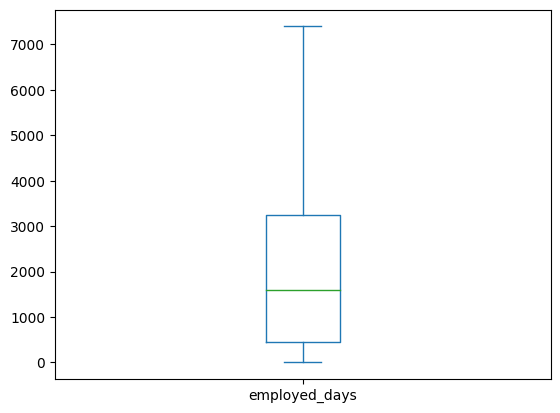

In [202]:
x_train["employed_days"].plot(kind = "box")

In [203]:
q1 = x_test["employed_days"].quantile(.25)
q3 = x_test["employed_days"].quantile(.75)
iqr = q3-q1

In [204]:
min = q1-1.5*iqr
max = q1+1.5*iqr

In [205]:
outlier = x_test[(x_test["employed_days"]<min) | (x_test["employed_days"]>max)]

In [206]:
outlier["employed_days"]=np.where(outlier["employed_days"]>max,max,outlier["employed_days"])

<ipython-input-206-75129bd9dcd0>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [207]:
x_test.loc[outlier.index,"employed_days"]=outlier["employed_days"]

In [208]:
x_test["employed_days"].describe()

count     306.000000
mean     1868.934641
std      1593.777467
min         0.000000
25%       432.750000
50%      1568.500000
75%      3153.000000
max      4513.125000
Name: employed_days, dtype: float64

<Axes: >

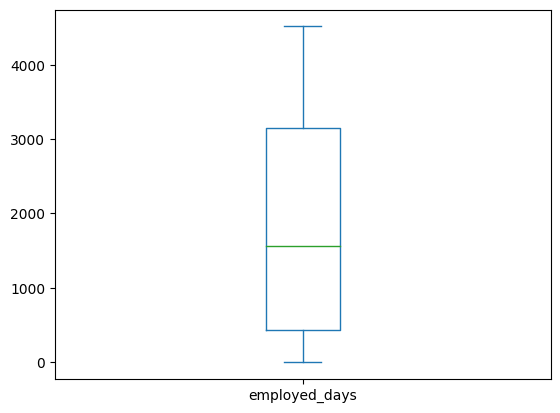

In [209]:
x_test["employed_days"].plot(kind = "box")

## income

In [210]:
x_train["income"].describe()

count    1.224000e+03
mean     1.909273e+05
std      1.137886e+05
min      3.375000e+04
25%      1.210500e+05
50%      1.665000e+05
75%      2.250000e+05
max      1.575000e+06
Name: income, dtype: float64

<Axes: >

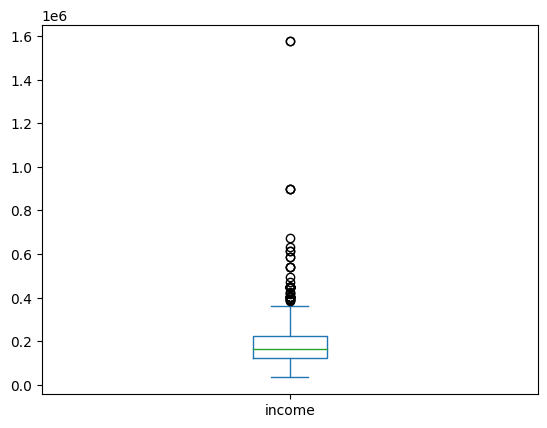

In [211]:
x_train["income"].plot(kind = "box")

In [212]:
q1 = x_train["income"].quantile(.25)
q3 = x_train["income"].quantile(.75)
iqr = q3-q1

In [213]:
min = q1-1.5*iqr
max = q1+1.5*iqr

In [214]:
outlier = x_train[x_train["income"]>max]

In [215]:
outlier["income"]=np.where(outlier["income"]>max,max,outlier["income"])

<ipython-input-215-72e3faf5a77c>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [216]:
x_train.loc[outlier.index,"income"]=outlier["income"]

<Axes: >

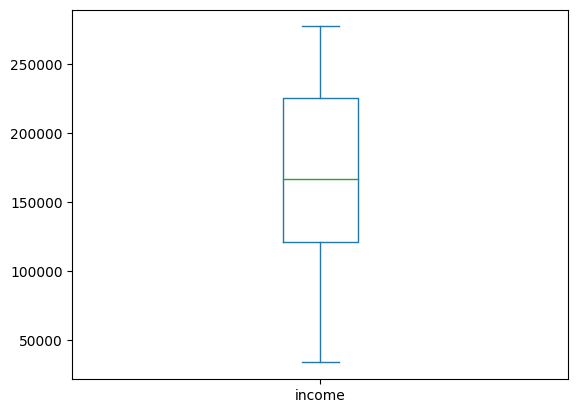

In [217]:
x_train["income"].plot(kind = "box")

<Axes: >

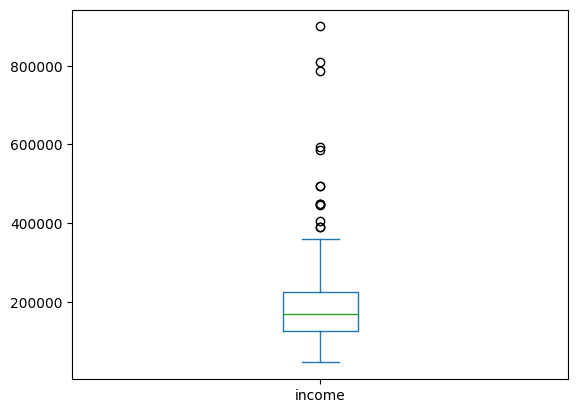

In [218]:
##test
x_test["income"].plot(kind = "box")

In [219]:

q1 = x_test["income"].quantile(.25)
q3 = x_test["income"].quantile(.75)
iqr = q3-q1

In [220]:
min = q1-1.5*iqr
max = q1+1.5*iqr

In [221]:
outlier = x_test[x_test["income"]>max]

In [222]:
outlier["income"]=np.where(outlier["income"]>max,max,outlier["income"])

<ipython-input-222-72e3faf5a77c>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [223]:
x_test.loc[outlier.index,"income"]=outlier["income"]

In [224]:
x_test["income"].describe()

count       306.000000
mean     175837.735294
std       63068.092309
min       45900.000000
25%      126000.000000
50%      168750.000000
75%      225000.000000
max      274500.000000
Name: income, dtype: float64

<Axes: >

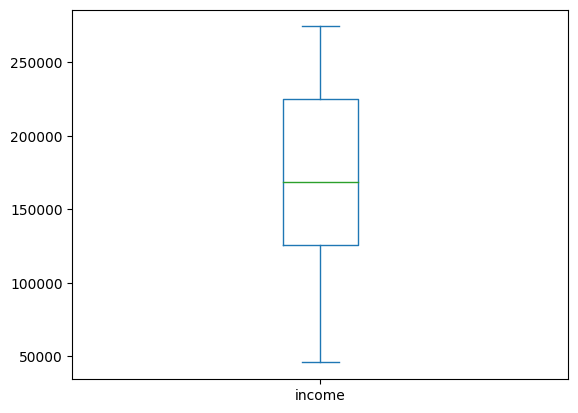

In [225]:
x_test["income"].plot(kind = "box")

## age

<Axes: >

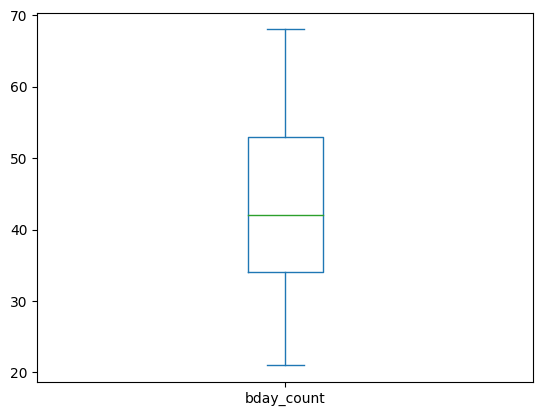

In [226]:
x_train["bday_count"].plot(kind = "box")

In [227]:
x_train_imp = x_train.copy()
x_test_imp = x_test.copy()

In [228]:
print(x_train.shape)
print(x_test.shape)

(1224, 18)
(306, 18)


In [229]:
x_train.isnull().sum()

car_owner         0
property_owner    0
children          0
income            0
income_type       0
edu               0
marital_status    0
housing_type      0
bday_count        0
employed_days     0
employed          0
m_phone           0
work_phone        0
phone             0
email             0
fam_mem           0
gender_imp        0
occu_imp          0
dtype: int64

In [230]:
x_train.head()

,car_owner,property_owner,children,income,income_type,edu,marital_status,housing_type,bday_count,employed_days,employed,m_phone,work_phone,phone,email,fam_mem,gender_imp,occu_imp
783,Y,Y,0,112500.0,Working,secondary,Married,House,47.00,1787.0,1,1,0,0,0,2,F,Sales staff
927,Y,Y,0,276975.0,Working,Higher education,Married,House,28.00,2231.0,1,1,0,0,0,2,M,Managers
670,N,Y,1,135000.0,Working,secondary,Civil marriage,House,36.00,2728.0,1,1,0,0,0,3,M,Laborers
823,N,Y,2,103500.0,Working,secondary,Married,House,39.75,6621.0,1,1,1,1,0,4,F,Medicine staff
778,Y,N,2,135000.0,Working,secondary,Married,With parents,46.00,561.0,1,1,0,0,0,4,M,Laborers


In [231]:
print(x_train.shape)
print(x_test.shape)

(1224, 18)
(306, 18)


In [232]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1224 entries, 783 to 1273
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   car_owner       1224 non-null   object 
 1   property_owner  1224 non-null   object 
 2   children        1224 non-null   int64  
 3   income          1224 non-null   float64
 4   income_type     1224 non-null   object 
 5   edu             1224 non-null   object 
 6   marital_status  1224 non-null   object 
 7   housing_type    1224 non-null   object 
 8   bday_count      1224 non-null   float64
 9   employed_days   1224 non-null   float64
 10  employed        1224 non-null   int64  
 11  m_phone         1224 non-null   int64  
 12  work_phone      1224 non-null   int64  
 13  phone           1224 non-null   int64  
 14  email           1224 non-null   int64  
 15  fam_mem         1224 non-null   int64  
 16  gender_imp      1224 non-null   object 
 17  occu_imp        1224 non-null  

In [233]:
x_train.head(2)

,car_owner,property_owner,children,income,income_type,edu,marital_status,housing_type,bday_count,employed_days,employed,m_phone,work_phone,phone,email,fam_mem,gender_imp,occu_imp
783,Y,Y,0,112500.0,Working,secondary,Married,House,47.0,1787.0,1,1,0,0,0,2,F,Sales staff
927,Y,Y,0,276975.0,Working,Higher education,Married,House,28.0,2231.0,1,1,0,0,0,2,M,Managers


## scaling

In [234]:
from sklearn.preprocessing import MinMaxScaler
ss = MinMaxScaler()
x_train[["income","bday_count","employed_days"]]=ss.fit_transform(x_train[["income","bday_count","employed_days"]])
x_test[["income","bday_count","employed_days"]]=ss.transform(x_test[["income","bday_count","employed_days"]])

In [235]:
x_train.shape

(1224, 18)

In [236]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1224 entries, 783 to 1273
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   car_owner       1224 non-null   object 
 1   property_owner  1224 non-null   object 
 2   children        1224 non-null   int64  
 3   income          1224 non-null   float64
 4   income_type     1224 non-null   object 
 5   edu             1224 non-null   object 
 6   marital_status  1224 non-null   object 
 7   housing_type    1224 non-null   object 
 8   bday_count      1224 non-null   float64
 9   employed_days   1224 non-null   float64
 10  employed        1224 non-null   int64  
 11  m_phone         1224 non-null   int64  
 12  work_phone      1224 non-null   int64  
 13  phone           1224 non-null   int64  
 14  email           1224 non-null   int64  
 15  fam_mem         1224 non-null   int64  
 16  gender_imp      1224 non-null   object 
 17  occu_imp        1224 non-null  

In [237]:
print(x_train.shape)
print(x_test.shape)

(1224, 18)
(306, 18)


In [238]:
x_train.head(2)

,car_owner,property_owner,children,income,income_type,edu,marital_status,housing_type,bday_count,employed_days,employed,m_phone,work_phone,phone,email,fam_mem,gender_imp,occu_imp
783,Y,Y,0,0.323774,Working,secondary,Married,House,0.553191,0.241511,1,1,0,0,0,2,F,Sales staff
927,Y,Y,0,1.000000,Working,Higher education,Married,House,0.148936,0.301517,1,1,0,0,0,2,M,Managers


## ordinal ecoding - edu column

In [239]:
from sklearn.preprocessing import OrdinalEncoder

oe = OrdinalEncoder()
#le = LabelEncoder()
x_train["edu"]=oe.fit_transform(x_train[["edu"]])

In [240]:
x_test["edu"]=oe.transform(x_test[["edu"]])

## onehotencoder - nominal categorical columns

In [241]:
from sklearn.compose import ColumnTransformer
ct2 = ColumnTransformer([("ohe",OneHotEncoder(sparse_output=False,drop = "first",handle_unknown="ignore"),
                          [0,1,4,6,7,16,17])],
                        remainder = "passthrough")



In [242]:
x_train = ct2.fit_transform(x_train)

In [243]:
print(x_train.shape)

(1224, 43)


In [244]:
x_test=ct2.transform(x_test)

In [245]:
print(x_train.shape)
print(x_test.shape)

(1224, 43)
(306, 43)


## Feature selection-k best

In [246]:
from sklearn.feature_selection import SelectKBest,chi2

In [247]:
skb = SelectKBest(chi2,k = 27)
x_train = skb.fit_transform(x_train,y_train)

In [248]:
x_test = skb.transform(x_test)

In [249]:
print(x_train.shape)
print(x_test.shape)

(1224, 27)
(306, 27)


## Model Building

In [250]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()
log.fit(x_train,y_train)

LogisticRegression()

In [251]:
y_pred = log.predict(x_test)

In [252]:
#importing various classification metrices
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,precision_score,recall_score,f1_score

In [253]:
print(accuracy_score(y_test,y_pred))
print(log.score(x_train,y_train))

0.8790849673202614
0.8954248366013072


In [254]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[269   0]
 [ 37   0]]
              precision    recall  f1-score   support

           0       0.88      1.00      0.94       269
           1       0.00      0.00      0.00        37

    accuracy                           0.88       306
   macro avg       0.44      0.50      0.47       306
weighted avg       0.77      0.88      0.82       306



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



## Sampling

### since we are having an biased classification problem sampling might help to deal with it

In [255]:
#importing random sampler and smote
from imblearn.over_sampling import RandomOverSampler,SMOTE
sm = SMOTE(random_state=21)
x_sm,y_sm=sm.fit_resample(x_train,y_train)

In [256]:
## random_Sampler
rn = RandomOverSampler(random_state=32)
x_rs,y_rs = rn.fit_resample(x_train,y_train)

In [257]:
log1 = LogisticRegression()
log1.fit(x_sm,y_sm)

LogisticRegression()

In [258]:
y_pred1 = log1.predict(x_test)

In [259]:
print(accuracy_score(y_test,y_pred1))
print(log1.score(x_sm,y_sm))
print(confusion_matrix(y_test,y_pred1))

0.6143790849673203
0.6587374199451053
[[172  97]
 [ 21  16]]


## Naive bayes

In [260]:
from sklearn.naive_bayes import BernoulliNB,GaussianNB

In [261]:
bnb = BernoulliNB()
gnb = GaussianNB()

In [262]:
bnb.fit(x_train,y_train)

BernoulliNB()

In [263]:
y_pred2 = bnb.predict(x_test)

In [264]:
print(accuracy_score(y_test,y_pred2))
print(bnb.score(x_train,y_train))
print(confusion_matrix(y_test,y_pred2))

0.8594771241830066
0.8913398692810458
[[261   8]
 [ 35   2]]


In [265]:
## gaussian

gnb.fit(x_train,y_train)

GaussianNB()

In [266]:
y_pred3= gnb.predict(x_test)

In [267]:
print(accuracy_score(y_test,y_pred3))
print(gnb.score(x_train,y_train))
print(confusion_matrix(y_test,y_pred3))

0.13398692810457516
0.15931372549019607
[[  6 263]
 [  2  35]]


## DecisionTree

In [268]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth = 6)


In [269]:
dt.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=6)

In [270]:
y_pred4 = dt.predict(x_test)

In [271]:
print(accuracy_score(y_test,y_pred4))
print(dt.score(x_train,y_train))
print(confusion_matrix(y_test,y_pred4))

0.8790849673202614
0.9150326797385621
[[264   5]
 [ 32   5]]


## KNN

In [272]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier(n_neighbors=1,algorithm="kd_tree",weights = "distance")

In [273]:
kn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='kd_tree', n_neighbors=1, weights='distance')

In [274]:
y_pred5=kn.predict(x_test)

In [275]:
print(accuracy_score(y_test,y_pred5))
print(kn.score(x_train,y_train))
print(confusion_matrix(y_test,y_pred5))

0.8725490196078431
0.9844771241830066
[[251  18]
 [ 21  16]]


## SVM

In [276]:
from sklearn.svm import SVC
svm = SVC(kernel = "rbf")

In [277]:
svm.fit(x_train,y_train)

SVC()

In [278]:
y_pred6 = svm.predict(x_test)

In [279]:
print(accuracy_score(y_test,y_pred6))
print(svm.score(x_train,y_train))
print(confusion_matrix(y_test,y_pred6))

0.8790849673202614
0.8929738562091504
[[269   0]
 [ 37   0]]


## RandomForest

In [280]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=50,max_depth = 5,max_features=4)
rf.fit(x_train,y_train)

RandomForestClassifier(max_depth=5, max_features=4, n_estimators=50)

In [281]:
y_pred7 = rf.predict(x_test)

In [282]:
print(accuracy_score(y_test,y_pred7))
print(rf.score(x_train,y_train))
print(confusion_matrix(y_test,y_pred7))

0.8790849673202614
0.8937908496732027
[[269   0]
 [ 37   0]]


## gradientboosting

In [283]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(n_estimators=300,max_depth=5,random_state=21)

In [284]:
gb.fit(x_train,y_train)

GradientBoostingClassifier(max_depth=5, n_estimators=300, random_state=21)

In [285]:
y_pred8 = gb.predict(x_test)

In [286]:
print(accuracy_score(y_test,y_pred8))
print(gb.score(x_train,y_train))
print(confusion_matrix(y_test,y_pred8))

0.9019607843137255
0.9861111111111112
[[258  11]
 [ 19  18]]


## VotingClassifier

In [287]:
from sklearn.ensemble import VotingClassifier
vt = VotingClassifier(estimators=[("gb",gb),("kn",kn),("log2",log1)],voting="soft")

In [288]:
vt.fit(x_train,y_train)

VotingClassifier(estimators=[('gb',
                              GradientBoostingClassifier(max_depth=5,
                                                         n_estimators=300,
                                                         random_state=21)),
                             ('kn',
                              KNeighborsClassifier(algorithm='kd_tree',
                                                   n_neighbors=1,
                                                   weights='distance')),
                             ('log2', LogisticRegression())],
                 voting='soft')

In [289]:
y_pred9=vt.predict(x_test)

In [290]:
print(accuracy_score(y_test,y_pred9))
print(vt.score(x_train,y_train))
print(confusion_matrix(y_test,y_pred9))
print(classification_report(y_test,y_pred9))

0.9019607843137255
0.9844771241830066
[[263   6]
 [ 24  13]]
              precision    recall  f1-score   support

           0       0.92      0.98      0.95       269
           1       0.68      0.35      0.46        37

    accuracy                           0.90       306
   macro avg       0.80      0.66      0.71       306
weighted avg       0.89      0.90      0.89       306



In [291]:
recall_score(y_test,y_pred9,average=None)

array([0.97769517, 0.35135135])

# stacking classifier

In [292]:
from sklearn.ensemble import StackingClassifier

In [293]:
stc = StackingClassifier(estimators=[("gb",gb),("kn",kn),("log2",log1),("vt",vt)],
                        final_estimator=KNeighborsClassifier())

In [294]:
stc.fit(x_train,y_train)

StackingClassifier(estimators=[('gb',
                                GradientBoostingClassifier(max_depth=5,
                                                           n_estimators=300,
                                                           random_state=21)),
                               ('kn',
                                KNeighborsClassifier(algorithm='kd_tree',
                                                     n_neighbors=1,
                                                     weights='distance')),
                               ('log2', LogisticRegression()),
                               ('vt',
                                VotingClassifier(estimators=[('gb',
                                                              GradientBoostingClassifier(max_depth=5,
                                                                                         n_estimators=300,
                                                                                         random_state=21)),
                                                             ('kn',
                                                              KNeighborsClassifier(algorithm='kd_tree',
                                                                                   n_neighbors=1,
                                                                                   weights='distance')),
                                                             ('log2',
                                                              LogisticRegression())],
                                                 voting='soft'))],
                   final_estimator=KNeighborsClassifier())

In [295]:
y_pred = stc.predict(x_test)

In [296]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[260   9]
 [ 22  15]]
              precision    recall  f1-score   support

           0       0.92      0.97      0.94       269
           1       0.62      0.41      0.49        37

    accuracy                           0.90       306
   macro avg       0.77      0.69      0.72       306
weighted avg       0.89      0.90      0.89       306



# Model comaparison

In [297]:
import re

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



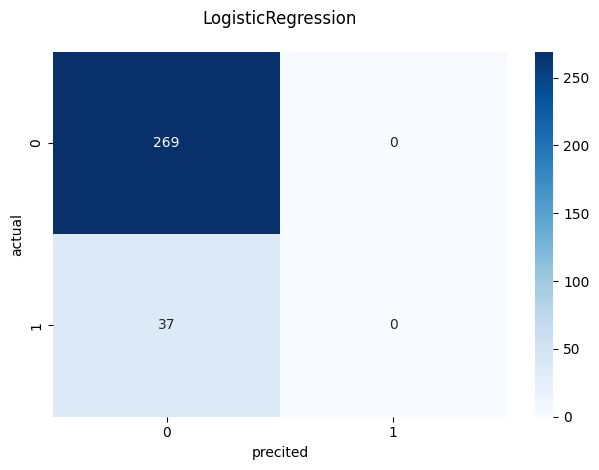

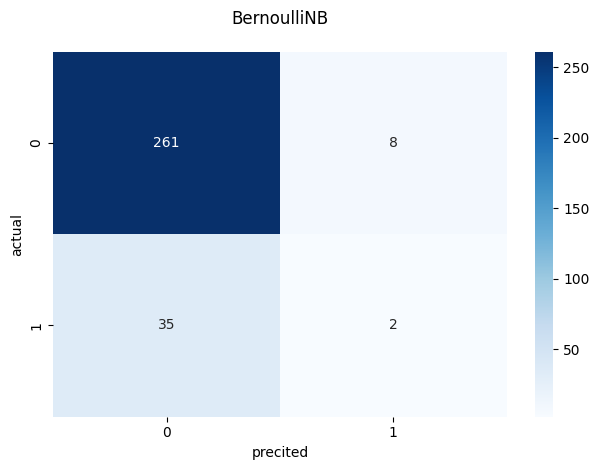

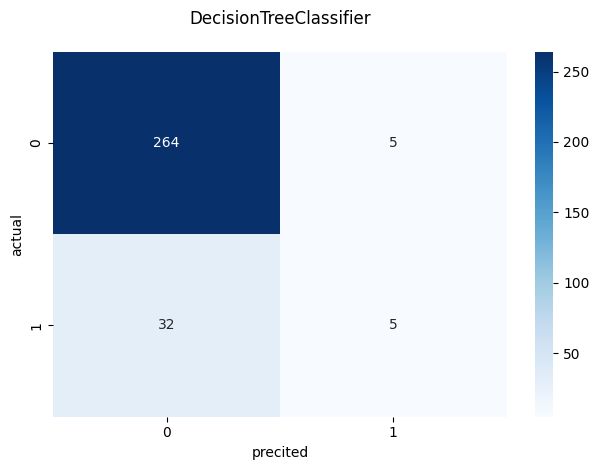

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



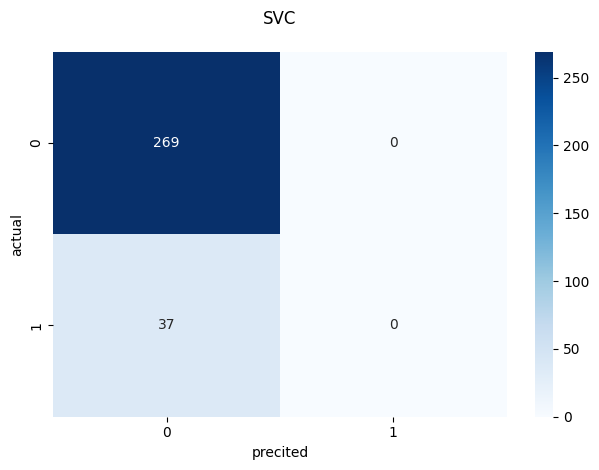

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



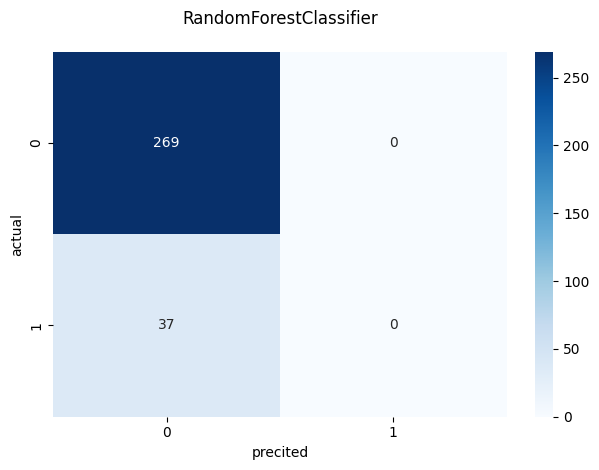

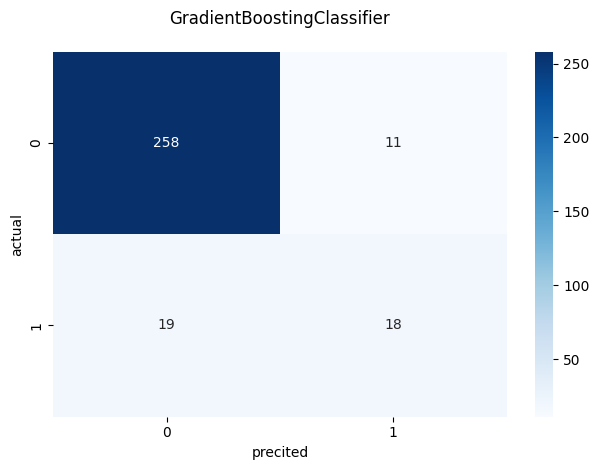

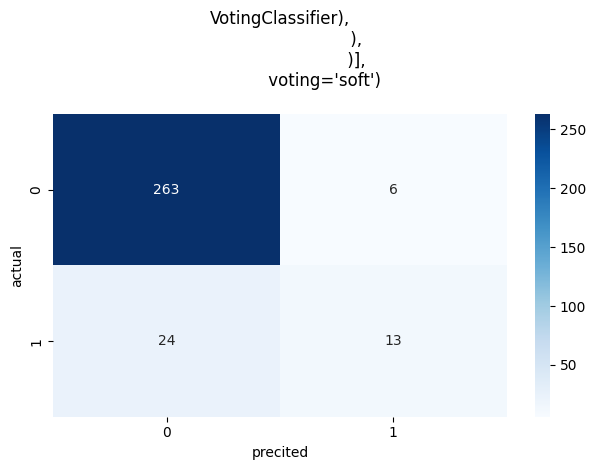

In [298]:
algo = []
zero = []
one = []
re0 = []
re1 = []
fsc0 = []
fsc1 = []
for i in [log1,bnb,dt,svm,rf,gb,vt]:
    i.fit(x_train,y_train)
    al = re.sub(r'\([^)]*\)',"",str(i))
    y_pred = i.predict(x_test)
    algo.append(al)
    zero.append(precision_score(y_test,y_pred,average=None)[0])
    one.append(precision_score(y_test,y_pred,average = None)[1])
    re0.append(recall_score(y_test,y_pred,average=None)[0])
    re1.append(recall_score(y_test,y_pred,average = None)[1])
    fsc0.append(f1_score(y_test,y_pred,pos_label=0))
    fsc1.append(f1_score(y_test,y_pred,pos_label=1))
    cm = confusion_matrix(y_test,y_pred)
    sns.heatmap(cm,fmt = "d",annot = True,cmap ="Blues")
    plt.title(al,pad = 20)
    plt.xlabel("precited")
    plt.ylabel("actual")
    plt.tight_layout()
    plt.show()
    print("============================================================================================")

In [299]:
prec_df = pd.DataFrame({"algo":algo,"zero_prec":zero,"one_prec":one,"recall_0":re0,"recall_1":re1,"f1_0":fsc0,"f1_1":fsc1})

In [300]:
prec_df.head()

,algo,zero_prec,one_prec,recall_0,recall_1,f1_0,f1_1
0,LogisticRegression,0.879085,0.0,1.000000,0.000000,0.935652,0.000000
1,BernoulliNB,0.881757,0.2,0.970260,0.054054,0.923894,0.085106
2,DecisionTreeClassifier,0.891892,0.5,0.981413,0.135135,0.934513,0.212766
3,SVC,0.879085,0.0,1.000000,0.000000,0.935652,0.000000
4,RandomForestClassifier,0.879085,0.0,1.000000,0.000000,0.935652,0.000000


In [301]:
prec_df["algo"]=prec_df["algo"].str.split("(").str.get(0)

In [302]:
prec_df["algo"]=prec_df["algo"].str.split(")").str.get(0)

In [303]:
#prec_df.sort_values(by=["one_prec","zero_prec"],ascending = False)

In [304]:
prec_df.sort_values(by = ["f1_1","f1_0"],ascending = False)

,algo,zero_prec,one_prec,recall_0,recall_1,f1_0,f1_1
5,GradientBoostingClassifier,0.931408,0.620690,0.959108,0.486486,0.945055,0.545455
6,VotingClassifier,0.916376,0.684211,0.977695,0.351351,0.946043,0.464286
2,DecisionTreeClassifier,0.891892,0.500000,0.981413,0.135135,0.934513,0.212766
1,BernoulliNB,0.881757,0.200000,0.970260,0.054054,0.923894,0.085106
0,LogisticRegression,0.879085,0.000000,1.000000,0.000000,0.935652,0.000000
3,SVC,0.879085,0.000000,1.000000,0.000000,0.935652,0.000000
4,RandomForestClassifier,0.879085,0.000000,1.000000,0.000000,0.935652,0.000000


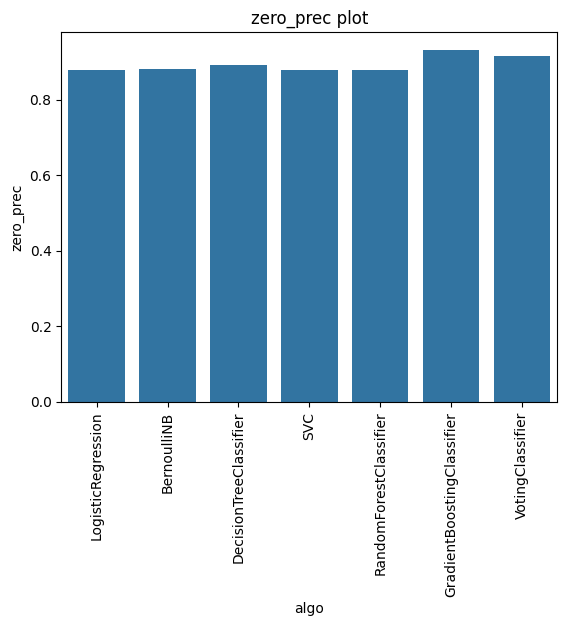

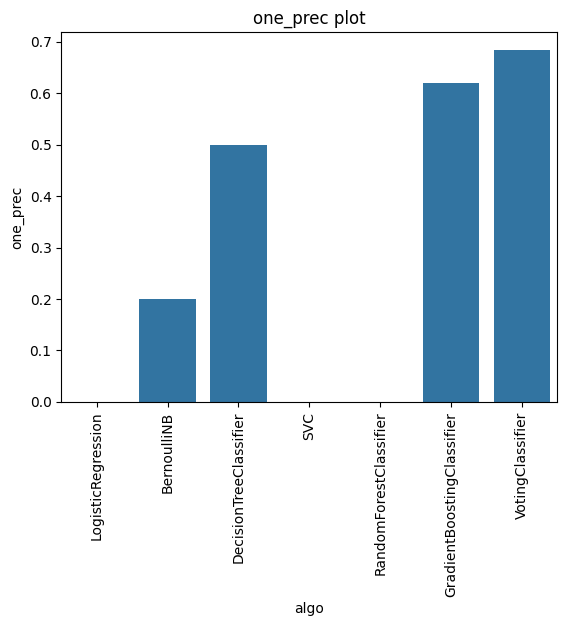

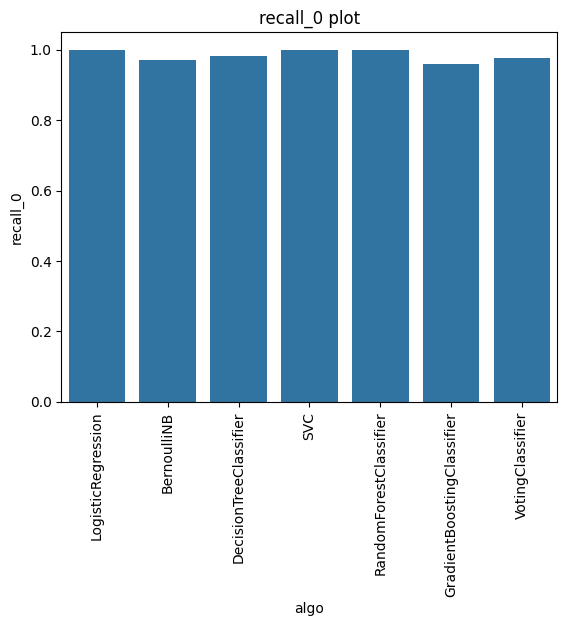

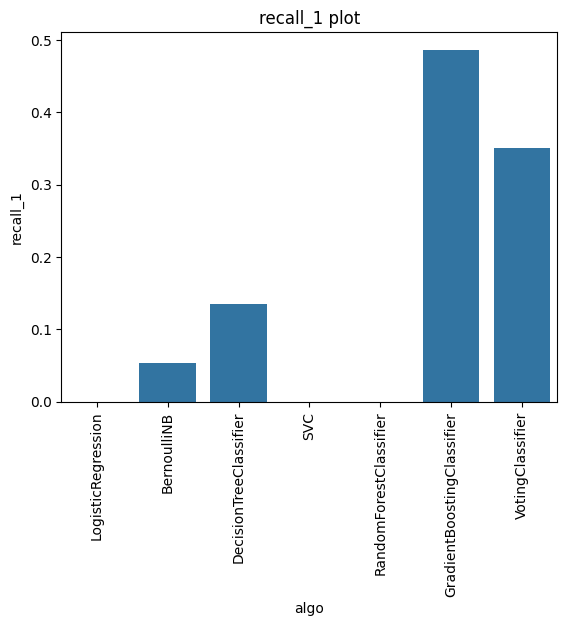

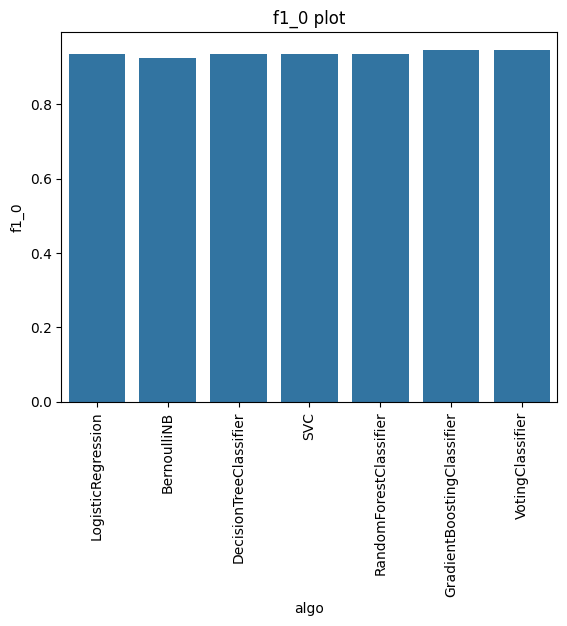

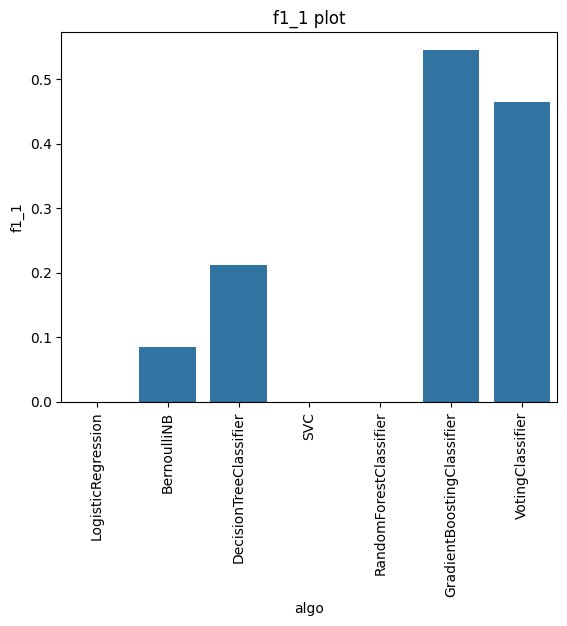

In [305]:
#plotting all classification metrics for different algorithms
for i in prec_df.columns[1:]:
    sns.barplot(prec_df,x="algo",y=i)
    plt.title(f"{i} plot")
    plt.xticks(rotation = "vertical")
    plt.show()

In [306]:
#np.save("C:/Users/USER/Downloads/odin_capstone/credit_card/x_train.npy",x_train)

In [307]:
#np.save("C:/Users/USER/Downloads/odin_capstone/credit_card/x_test.npy",x_test)

In [308]:
#np.save("C:/Users/USER/Downloads/odin_capstone/credit_card/y_train.npy",y_train)

In [309]:
#np.save("C:/Users/USER/Downloads/odin_capstone/credit_card/y_test.npy",y_test)

# Class weights

### Since the data is highly imbalanced, assigning class weights might be crucial for training a classification model that can effectively address the imbalance.

In [310]:
cw = {0: 0.5, 1:4}

In [311]:
logis = LogisticRegression(class_weight=cw,random_state=21)
dtr = DecisionTreeClassifier(class_weight=cw,random_state=22)
rft = RandomForestClassifier(class_weight=cw,random_state=11)
svc = SVC(class_weight=cw,random_state=21)
#gradient_boosting = GradientBoostingClassifier(n_estimators = 100,class_weight=cw)

In [312]:
d = {"lr":logis,"dtr":dtr,"rft":rft,"svc":svc}

In [313]:
for i,j in d.items():
    j.fit(x_train,y_train)
    y_pred = j.predict(x_test)
    print(i)
    print(confusion_matrix(y_test,y_pred))
    print("========================================================")

lr
[[194  75]
 [ 20  17]]
dtr
[[247  22]
 [ 17  20]]
rft
[[264   5]
 [ 21  16]]
svc
[[210  59]
 [ 24  13]]


In [314]:
#########################################################################################

In [315]:
cw = {0: 1, 1:10}

In [316]:
rf = RandomForestClassifier(n_estimators=100,class_weight=cw,random_state=11)

In [317]:
rf.fit(x_train,y_train)

RandomForestClassifier(class_weight={0: 1, 1: 10}, random_state=11)

In [318]:
y_pred = rf.predict(x_test)

In [319]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[264   5]
 [ 21  16]]
              precision    recall  f1-score   support

           0       0.93      0.98      0.95       269
           1       0.76      0.43      0.55        37

    accuracy                           0.92       306
   macro avg       0.84      0.71      0.75       306
weighted avg       0.91      0.92      0.90       306



In [320]:
#####################################################################################

In [321]:
sw = np.zeros(len(y_train))
sw[y_train == 0] = 1
sw[y_train == 1] = 5

In [322]:
gb = GradientBoostingClassifier(n_estimators=100)

In [323]:
gb.fit(x_train,y_train,sw)

GradientBoostingClassifier()

In [324]:
y_pred = gb.predict(x_test)

In [325]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[246  23]
 [ 23  14]]
              precision    recall  f1-score   support

           0       0.91      0.91      0.91       269
           1       0.38      0.38      0.38        37

    accuracy                           0.85       306
   macro avg       0.65      0.65      0.65       306
weighted avg       0.85      0.85      0.85       306



In [326]:
#####################################################################################

In [327]:
vt = VotingClassifier(estimators=[("lr",logis),("dtr",dtr),("rft",rft),("svc",svc)])

In [328]:
vt.fit(x_train,y_train)

VotingClassifier(estimators=[('lr',
                              LogisticRegression(class_weight={0: 0.5, 1: 4},
                                                 random_state=21)),
                             ('dtr',
                              DecisionTreeClassifier(class_weight={0: 0.5,
                                                                   1: 4},
                                                     random_state=22)),
                             ('rft',
                              RandomForestClassifier(class_weight={0: 0.5,
                                                                   1: 4},
                                                     random_state=11)),
                             ('svc',
                              SVC(class_weight={0: 0.5, 1: 4},
                                  random_state=21))])

In [329]:
y_pred = vt.predict(x_test)

In [330]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[262   7]
 [ 23  14]]
              precision    recall  f1-score   support

           0       0.92      0.97      0.95       269
           1       0.67      0.38      0.48        37

    accuracy                           0.90       306
   macro avg       0.79      0.68      0.71       306
weighted avg       0.89      0.90      0.89       306



# Training model after feature selection-Filter method

In [331]:
x_train = x_train_imp.copy()

In [332]:
x_test=x_test_imp.copy()

# Chi2

## Hypothesis-
                    1-owning property and car would definitely have a positive effect on credit card application approved
                    2-gender would have no affect on credit aprroval desision
                    3-education column would definitely have a affect on credit approval decision

In [333]:
from scipy.stats import chi2_contingency,chi2
#selecting all my columns with dtype object
col = x_train.select_dtypes(include=["object"]).columns

In [334]:
#performing chi2 test for association between each categorical and output  feature and storing all p values in a dictionary
d = {}
for i in col:
    contin = pd.crosstab(x_train[i],y_train)
    chi2, p, _, _ = chi2_contingency(contin)
    d[i]=p

In [335]:
d

{'car_owner': 0.7743097944218145,
 'property_owner': 1.0,
 'income_type': 0.04504734009579331,
 'edu': 0.002894746157623432,
 'marital_status': 0.05572178815837397,
 'housing_type': 4.784832347589426e-06,
 'gender_imp': 0.020193004898594918,
 'occu_imp': 0.008900980952845972}

In [336]:
x_train.head()

,car_owner,property_owner,children,income,income_type,edu,marital_status,housing_type,bday_count,employed_days,employed,m_phone,work_phone,phone,email,fam_mem,gender_imp,occu_imp
783,Y,Y,0,112500.0,Working,secondary,Married,House,47.00,1787.0,1,1,0,0,0,2,F,Sales staff
927,Y,Y,0,276975.0,Working,Higher education,Married,House,28.00,2231.0,1,1,0,0,0,2,M,Managers
670,N,Y,1,135000.0,Working,secondary,Civil marriage,House,36.00,2728.0,1,1,0,0,0,3,M,Laborers
823,N,Y,2,103500.0,Working,secondary,Married,House,39.75,6621.0,1,1,1,1,0,4,F,Medicine staff
778,Y,N,2,135000.0,Working,secondary,Married,With parents,46.00,561.0,1,1,0,0,0,4,M,Laborers


In [337]:
#performing chi2 test for fetaures that are essentila categorical in nature/
dc={}
for i in ["children","employed","m_phone","work_phone","phone","fam_mem"]:
    contin = pd.crosstab(x_train[i],y_train)
    chi2, p, _, _ = chi2_contingency(contin)
    dc[i]=p


In [338]:
d.update(dc)

In [339]:
#setting up a significance level to
alpha = 0.05

In [340]:
for i,j in d.items():
    if d[i]>alpha:
        print(i,j)


car_owner 0.7743097944218145
property_owner 1.0
marital_status 0.05572178815837397
employed 0.3196305612221369
m_phone 1.0
work_phone 0.7186890966607027
phone 0.6954901203644497


## Hypothesis check-
#### 1-null hypo1 - owning property and car would definitely have a positive effect on credit card application                      approved

result - null hypothesis is rejected as p value is greater than alpha value which indicates that there is                                no statistically significant relation between property and label column & car_owner and label                                  column

#### 2-null hypo2 -gender would have no affect on credit aprroval desision

result - null hypothesis is rejected as p value is less than alpha value it indicates that there is a significant relation between gender and target column.

#### 3-null hypo3-3-education column would definitely have a affect on credit approval decision

result - null hypothesis is not rejected as p value is less than alpha which indicates there is a signifcant relation between education and target column

In [341]:
x_train = x_train.drop(columns = ["car_owner","property_owner","m_phone","work_phone","phone","occu_imp","employed","marital_status"])

In [342]:
x_test = x_test.drop(columns = ["car_owner","property_owner","m_phone","work_phone","phone","occu_imp","employed","marital_status"])

In [343]:
x_train.head()

,children,income,income_type,edu,housing_type,bday_count,employed_days,email,fam_mem,gender_imp
783,0,112500.0,Working,secondary,House,47.00,1787.0,0,2,F
927,0,276975.0,Working,Higher education,House,28.00,2231.0,0,2,M
670,1,135000.0,Working,secondary,House,36.00,2728.0,0,3,M
823,2,103500.0,Working,secondary,House,39.75,6621.0,0,4,F
778,2,135000.0,Working,secondary,With parents,46.00,561.0,0,4,M


# T-Test

In [344]:
from scipy.stats import ttest_ind
#from scipy.stats import shapiro

In [345]:
#statistic, p_value = shapiro(np.log(x_train["employed_days"]))

#alpha = 0.05
#print(p_value)

In [346]:
d = {}
for i in ["income","bday_count","employed_days"]:
    g1 = x_train[y_train == 0][i]
    g2 = x_train[y_train == 1][i]
    _, p_value = ttest_ind(g1, g2)
    d[i]=p_value


In [347]:
d

{'income': 0.3998444341931854,
 'bday_count': 0.08799647468659523,
 'employed_days': 0.0016022413311118373}

## scaling

In [348]:
x_train.head()

,children,income,income_type,edu,housing_type,bday_count,employed_days,email,fam_mem,gender_imp
783,0,112500.0,Working,secondary,House,47.00,1787.0,0,2,F
927,0,276975.0,Working,Higher education,House,28.00,2231.0,0,2,M
670,1,135000.0,Working,secondary,House,36.00,2728.0,0,3,M
823,2,103500.0,Working,secondary,House,39.75,6621.0,0,4,F
778,2,135000.0,Working,secondary,With parents,46.00,561.0,0,4,M


In [349]:
ss = MinMaxScaler()
x_train[["income","bday_count","employed_days"]]=ss.fit_transform(x_train[["income","bday_count","employed_days"]])
x_test[["income","bday_count","employed_days"]]=ss.transform(x_test[["income","bday_count","employed_days"]])

In [350]:
oe = OrdinalEncoder()
#le = LabelEncoder()
x_train["edu"]=oe.fit_transform(x_train[["edu"]])

In [351]:
x_test["edu"]=oe.transform(x_test[["edu"]])

In [352]:
ct1 = ColumnTransformer([("ohe",OneHotEncoder(sparse_output=False,drop = "first",handle_unknown="ignore"),
                          [2,4,9])],
                        remainder = "passthrough")

In [353]:
x_train = ct1.fit_transform(x_train)

In [354]:
x_test = ct1.transform(x_test)

In [355]:
print(x_train.shape)
print(x_test.shape)

(1224, 16)
(306, 16)


In [356]:
logg = LogisticRegression()


In [357]:
cw = {0:1,1:5}

In [358]:
log = LogisticRegression(max_iter = 10,class_weight=cw,random_state=21)
svm = SVC(probability=True,class_weight=cw,random_state=3)
knn = KNeighborsClassifier(n_neighbors=4)
dt = DecisionTreeClassifier(max_depth = 5,class_weight=cw,random_state=32)
rf = RandomForestClassifier(n_estimators=200,max_depth=5,class_weight=cw,random_state=21)
gb = GradientBoostingClassifier(n_estimators=100,max_depth=3,random_state=23)


In [359]:
d = {"log":log,
    "svm":svm,
    "knn":knn,
    "dt":dt,
    "rf":rf,
    "gb":gb}

In [360]:
l = [log,svm,knn,dt,rf,gb]

In [361]:
for i in l:
    i.fit(x_train,y_train)
    y_pred = i.predict(x_test)
    print(i)
    print(confusion_matrix(y_test,y_pred))
    print("============================================")

LogisticRegression(class_weight={0: 1, 1: 5}, max_iter=10, random_state=21)
[[243  26]
 [ 32   5]]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



SVC(class_weight={0: 1, 1: 5}, probability=True, random_state=3)
[[254  15]
 [ 31   6]]
KNeighborsClassifier(n_neighbors=4)
[[264   5]
 [ 31   6]]
DecisionTreeClassifier(class_weight={0: 1, 1: 5}, max_depth=5, random_state=32)
[[256  13]
 [ 26  11]]
RandomForestClassifier(class_weight={0: 1, 1: 5}, max_depth=5, n_estimators=200,
                       random_state=21)
[[263   6]
 [ 32   5]]
GradientBoostingClassifier(random_state=23)
[[265   4]
 [ 30   7]]


# sampling

In [362]:
from sklearn.metrics import classification_report
sm = SMOTE(random_state=21)
x_sm,y_sm=sm.fit_resample(x_train,y_train)

In [363]:
for i in l:
    i.fit(x_sm,y_sm)
    y_pred = i.predict(x_test)
    print(i)
    print(confusion_matrix(y_test,y_pred))
    print(classification_report(y_test,y_pred))
    print("=============================================================================================")

LogisticRegression(class_weight={0: 1, 1: 5}, max_iter=10, random_state=21)
[[  0 269]
 [  0  37]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       269
           1       0.12      1.00      0.22        37

    accuracy                           0.12       306
   macro avg       0.06      0.50      0.11       306
weighted avg       0.01      0.12      0.03       306



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/l

SVC(class_weight={0: 1, 1: 5}, probability=True, random_state=3)
[[ 26 243]
 [  1  36]]
              precision    recall  f1-score   support

           0       0.96      0.10      0.18       269
           1       0.13      0.97      0.23        37

    accuracy                           0.20       306
   macro avg       0.55      0.53      0.20       306
weighted avg       0.86      0.20      0.18       306

KNeighborsClassifier(n_neighbors=4)
[[235  34]
 [ 15  22]]
              precision    recall  f1-score   support

           0       0.94      0.87      0.91       269
           1       0.39      0.59      0.47        37

    accuracy                           0.84       306
   macro avg       0.67      0.73      0.69       306
weighted avg       0.87      0.84      0.85       306

DecisionTreeClassifier(class_weight={0: 1, 1: 5}, max_depth=5, random_state=32)
[[ 28 241]
 [  3  34]]
              precision    recall  f1-score   support

           0       0.90      0.10      0.

In [364]:
from sklearn.ensemble import VotingClassifier
vt = VotingClassifier(estimators=[("gb",gb),("kn",knn),("log1",log),("rf",rf)],voting="soft")

In [365]:
vt.fit(x_sm,y_sm)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



VotingClassifier(estimators=[('gb',
                              GradientBoostingClassifier(random_state=23)),
                             ('kn', KNeighborsClassifier(n_neighbors=4)),
                             ('log1',
                              LogisticRegression(class_weight={0: 1, 1: 5},
                                                 max_iter=10,
                                                 random_state=21)),
                             ('rf',
                              RandomForestClassifier(class_weight={0: 1, 1: 5},
                                                     max_depth=5,
                                                     n_estimators=200,
                                                     random_state=21))],
                 voting='soft')

In [366]:
y_pred = vt.predict(x_test)

In [367]:
print(confusion_matrix(y_test,y_pred))

[[140 129]
 [  9  28]]


In [368]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.52      0.67       269
           1       0.18      0.76      0.29        37

    accuracy                           0.55       306
   macro avg       0.56      0.64      0.48       306
weighted avg       0.85      0.55      0.62       306



In [369]:
cm = confusion_matrix(y_test,y_pred)

Text(50.722222222222214, 0.5, 'actual')

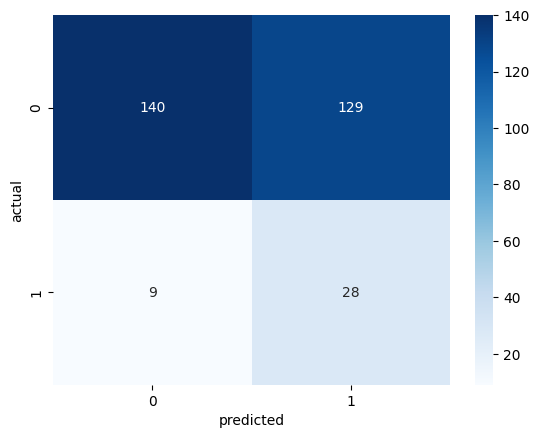

In [370]:
sns.heatmap(cm,annot = True,fmt="d",cmap = "Blues")
plt.xlabel("predicted")
plt.ylabel("actual")

# Votingclassifier - sklearn Pipeline

In [371]:
from sklearn.linear_model import Perceptron

In [372]:
x_train = x_train_imp.copy()

In [373]:
x_test = x_test_imp.copy()

In [374]:
x_train.head(2)

,car_owner,property_owner,children,income,income_type,edu,marital_status,housing_type,bday_count,employed_days,employed,m_phone,work_phone,phone,email,fam_mem,gender_imp,occu_imp
783,Y,Y,0,112500.0,Working,secondary,Married,House,47.0,1787.0,1,1,0,0,0,2,F,Sales staff
927,Y,Y,0,276975.0,Working,Higher education,Married,House,28.0,2231.0,1,1,0,0,0,2,M,Managers


In [375]:
x_train = x_train.drop(columns = ["car_owner","property_owner","m_phone","work_phone","phone","occu_imp","employed","marital_status"])

In [376]:
x_test = x_test.drop(columns = ["car_owner","property_owner","m_phone","work_phone","phone","occu_imp","employed","marital_status"])

In [377]:
x_train.head()

,children,income,income_type,edu,housing_type,bday_count,employed_days,email,fam_mem,gender_imp
783,0,112500.0,Working,secondary,House,47.00,1787.0,0,2,F
927,0,276975.0,Working,Higher education,House,28.00,2231.0,0,2,M
670,1,135000.0,Working,secondary,House,36.00,2728.0,0,3,M
823,2,103500.0,Working,secondary,House,39.75,6621.0,0,4,F
778,2,135000.0,Working,secondary,With parents,46.00,561.0,0,4,M


In [378]:
col = ["edu"]

In [379]:
ct = ColumnTransformer([("tr1",OneHotEncoder(sparse_output=False,drop = "first"),
                         ["income_type","housing_type","gender_imp"]),
                      ("tr2",OrdinalEncoder(),col) ],remainder = "passthrough")

In [380]:
ct2 = ColumnTransformer([("trf1",MinMaxScaler(),[1,5,6])],remainder = "passthrough")

In [381]:
from sklearn.pipeline import Pipeline

In [382]:
pipe = Pipeline([("p1",ct),
                ("p2",ct2),
                ("p4",VotingClassifier(estimators=[("lr",logis),("dtr",dtr),("rft",rft),("svc",svc)]))])

In [383]:
pipe.fit(x_train,y_train)

Pipeline(steps=[('p1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('tr1',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  ['income_type',
                                                   'housing_type',
                                                   'gender_imp']),
                                                 ('tr2', OrdinalEncoder(),
                                                  ['edu'])])),
                ('p2',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('trf1', MinMaxScaler(),
                                                  [1, 5, 6])])),
                ('p4',
                 VotingClassifier(estimators=[('lr',
                                               LogisticRegression(class_weight={0: 0.5,
                                                                                1: 4},
                                                                  random_state=21)),
                                              ('dtr',
                                               DecisionTreeClassifier(class_weight={0: 0.5,
                                                                                    1: 4},
                                                                      random_state=22)),
                                              ('rft',
                                               RandomForestClassifier(class_weight={0: 0.5,
                                                                                    1: 4},
                                                                      random_state=11)),
                                              ('svc',
                                               SVC(class_weight={0: 0.5, 1: 4},
                                                   random_state=21))]))])

In [384]:
y_pred = pipe.predict(x_test)

In [385]:
print(confusion_matrix(y_test,y_pred))

[[264   5]
 [ 23  14]]


In [386]:
import pickle

In [387]:
#saving my datafame and pipeline into pickle files

pickle.dump(df,open("df.pkl","wb"))
pickle.dump(pipe,open("pipe.pkl","wb"))

# These pickled files will be used in a Streamlit app for credit card application classifier .
